### **1. Problem Definition**

**I. Predicting Creditworthiness with Supervised Learning**

**II. Analysing Behaviours with Unsupervised Learning**

### **2. Data Collection**

**2.1 Importing Libraries for Data Analysis and Machine Learning**

In [ ]:
!pip install umap-learn
!pip install imblearn
!pip install umap-learn
!pip install imblearn
!pip install xgboost # Install the xgboost package
!pip install --upgrade scikit-learn xgboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy import stats
from sklearn import tree
import umap.umap_ as umap
from scipy.cluster import hierarchy
import plotly.express as px
import time
from sklearn import metrics
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Load the dataset
df = pd.read_csv('https://drive.google.com/uc?id=1IyjP6Q-PhIgPER_OOd42ADwuG7VNJNv5')

<ipython-input-83-71e6ff493615>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://drive.google.com/uc?id=1IyjP6Q-PhIgPER_OOd42ADwuG7VNJNv5')


In [ ]:
df.shape

(100000, 28)

**2.2 Dataset Reshuffling and Reduction for easy processing**

In [ ]:
#This code reshuffles and reduces the dataset to 20%, then resets its index.
import pandas as pd
from sklearn.utils import shuffle

# df is the DataFrame
df = pd.read_csv('https://drive.google.com/uc?id=1IyjP6Q-PhIgPER_OOd42ADwuG7VNJNv5')

# Set the seed for reproducibility
random_seed = 42

# Reshuffle the dataset
shuffled_df = shuffle(df, random_state=random_seed)

# Reduce the dataset size (e.g., retain 20% of the data)
df = shuffled_df.sample(frac=0.2, random_state=random_seed)  # Adjust `frac` to your desired percentage

# Reset the index of the reduced dataset
df = df.reset_index(drop=True)

df.shape

<ipython-input-85-5a526e71f901>:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://drive.google.com/uc?id=1IyjP6Q-PhIgPER_OOd42ADwuG7VNJNv5')


(20000, 28)

The code loads a dataset, reshuffles it, reduces its size to 20%, resets the index, and displays the final shape.

### **3. Exploratory Data Analysis**


#### **3.1. Dataset Inspection**

 Understand the size and structure of the dataset.

In [ ]:
# Print the dataset shape.
print("Shape of the dataset:", df.shape)

Shape of the dataset: (20000, 28)


In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


ID Customer_ID   Month               Name  Age          SSN  \
0  0x13100   CUS_0xcfc   March  Catherine Bosleyz   31  555-99-1654   
1  0x1f0e1  CUS_0x1d13  August               Jany   23  132-53-5164   
2  0x2357c  CUS_0x57f0   March              Kateb   31  146-34-8954   
3  0x12391  CUS_0x8018  August                NaN  52_  456-03-1565   
4  0x1d90f  CUS_0x4ed2    June          Schuetzek   22  442-26-8125   

  Occupation      Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   Engineer          15330.305            1135.525417                  4   
1   Musician            73314.6            6180.550000                 10   
2     Writer           171781.8                    NaN                  0   
3   Mechanic            49937.4            3670.800284                  3   
4     Lawyer  88290.45000000003            7323.537500                  4   

   ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0  ...           _            672.49                32.991519   
1  ...         Bad            4709.8                30.811756   
2  ...        Good            275.92                42.425908   
3  ...    Standard           1069.53                33.521334   
4  ...    Standard             412.4                30.074352   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0                    NaN                     No           46.388945   
1  12 Years and 2 Months                    Yes          465.828328   
2  19 Years and 0 Months                     No          258.749346   
3  16 Years and 5 Months                    Yes          455.867314   
4  19 Years and 3 Months                     No           56.615383   

  Amount_invested_monthly                Payment_Behaviour  \
0       65.97411958788724   Low_spent_Small_value_payments   
1      41.004031904056646  High_spent_Large_value_payments   
2       150.8180267150832  High_spent_Large_value_payments   
3        379.883968179635   Low_spent_Large_value_payments   
4       664.6866854275603                           !@9#%8   

      Monthly_Balance Credit_Score  
0   291.1894772853627     Standard  
1   351.2226401424756     Standard  
2  1248.9476273956602         Good  
3   250.8434336037399         Good  
4   281.0516813409989         Good  

[5 rows x 28 columns]

In [ ]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
display(df.tail())

Last few rows of the dataset:


ID Customer_ID     Month                Name Age          SSN  \
19995  0x231cd  CUS_0x8956    August              Maurof  24    #F%$D@*&8   
19996  0x11491  CUS_0x3d60    August                 NaN  24  127-22-3098   
19997  0x1931b  CUS_0xaaae  February  Andrea Shalal-Esab  46  913-85-7120   
19998   0xfeda  CUS_0x4824       May            "Eileenx  31  188-94-9368   
19999  0x1fa65  CUS_0x1bf1    August       Robin Emmottz  55    #F%$D@*&8   

       Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
19995  Accountant       43615.2            3420.600000                  4   
19996     Teacher      40289.79            3073.482500                  5   
19997  Accountant      42735.93            3632.327500                  7   
19998    Musician     26794.85_            2368.904167                  4   
19999      Lawyer    18320277.0            3938.193333                  5   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
19995  ...        Good            1030.5                32.849369   
19996  ...        Good           1073.74                36.465492   
19997  ...    Standard           1385.62                31.357440   
19998  ...           _           1484.37                30.892284   
19999  ...        Good            515.73                38.096659   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
19995                     NaN                     No          128.549987   
19996   16 Years and 5 Months                     No           38.976390   
19997   14 Years and 5 Months                    Yes          152.496438   
19998  12 Years and 11 Months                    Yes          151.922725   
19999   20 Years and 3 Months                     No           35.374569   

      Amount_invested_monthly                Payment_Behaviour  \
19995      169.64140462001052   Low_spent_Small_value_payments   
19996               __10000__  High_spent_Small_value_payments   
19997       89.97793330484905  High_spent_Large_value_payments   
19998      122.31532933155228  High_spent_Small_value_payments   
19999       265.4921062239007   Low_spent_Small_value_payments   

          Monthly_Balance Credit_Score  
19995  333.86860866256734         Poor  
19996   374.9843353161296     Standard  
19997  360.75837906833436         Poor  
19998   222.6523624153401     Standard  
19999   382.9526576520716     Standard  

[5 rows x 28 columns]

In [ ]:
# Display column data types and memory usage
print("Column Data Types and Memory Usage:")
print(df.info())

Column Data Types and Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  object 
 1   Customer_ID               20000 non-null  object 
 2   Month                     20000 non-null  object 
 3   Name                      17944 non-null  object 
 4   Age                       20000 non-null  object 
 5   SSN                       20000 non-null  object 
 6   Occupation                20000 non-null  object 
 7   Annual_Income             20000 non-null  object 
 8   Monthly_Inhand_Salary     16996 non-null  float64
 9   Num_Bank_Accounts         20000 non-null  int64  
 10  Num_Credit_Card           20000 non-null  int64  
 11  Interest_Rate             20000 non-null  int64  
 12  Num_of_Loan               20000 non-null  object 
 13  Type_of_Loan             

**3.2 Column Data Types Distribution**

 Examine and visualize the distribution of column data types.

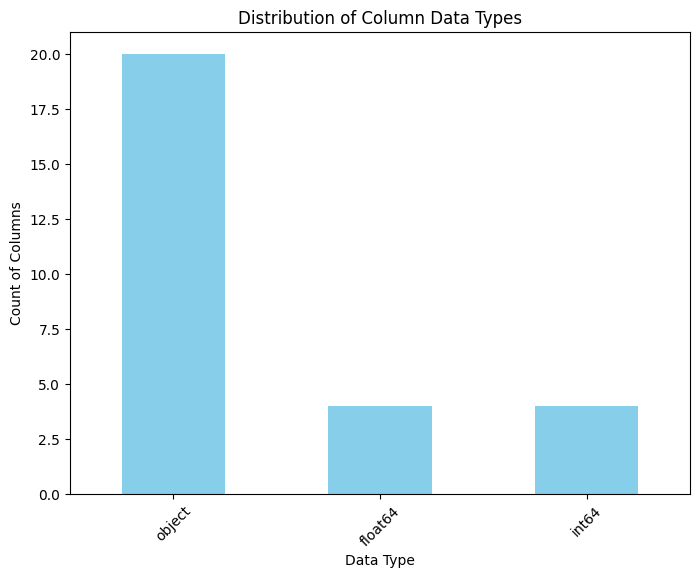

In [ ]:
# Count the number of columns of each data type
# Plot a bar chart for data types distribution.
data_types = df.dtypes.value_counts()
plt.figure(figsize=(8, 6))
data_types.plot(kind='bar', color='skyblue')
plt.title('Distribution of Column Data Types')
plt.xlabel('Data Type')
plt.ylabel('Count of Columns')
plt.xticks(rotation=45)
plt.show()

The bar chart illustrates the distribution of different data types in the dataset. The majority of columns are of type "object" (categorical data), while fewer columns are of types "float64" and "int64" (numerical data).

**3.3 Memory Usage of Columns in the Dataset**

Identify columns consuming significant memory.

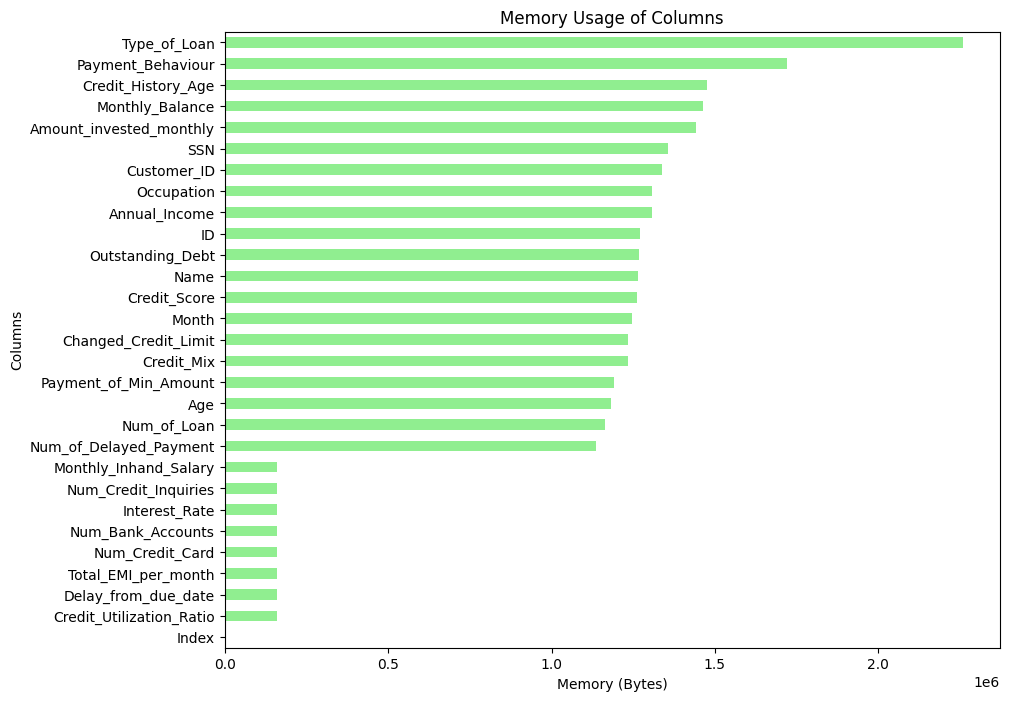

In [ ]:
# Visualize memory usage with a horizontal bar chart.
memory_usage = df.memory_usage(deep=True).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
memory_usage.plot(kind='barh', color='lightgreen')
plt.title('Memory Usage of Columns')
plt.xlabel('Memory (Bytes)')
plt.ylabel('Columns')
plt.gca().invert_yaxis()
plt.show()

The bar chart shows the memory usage of each column in the dataset. It highlights that columns such as "Type_of_Loan," "Payment_Behaviour," and "Credit_History_Age" consume the most memory, while others like "Monthly_Inhand_Salary" and "Total_EMI_per_month" use significantly less memory.

**3.4 Summary Statistics**

***3.1 Numerical Columns***

Analyze basic statistics for numerical columns.

Summary statistics for numerical columns:


Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           16996.000000        20000.00000     20000.000000   
mean             4182.107074           17.57670        22.439250   
std              3176.508086          122.35467       128.576397   
min               303.645417           -1.00000         0.000000   
25%              1621.986563            3.00000         4.000000   
50%              3092.270000            6.00000         5.000000   
75%              5926.746667            7.00000         7.000000   
max             15204.633333         1798.00000      1498.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count   20000.000000         20000.000000          19570.000000   
mean       76.842100            20.936350             26.467092   
std       484.448806            14.927406            187.072284   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5776.000000            67.000000           2588.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count              20000.000000         20000.000000  
mean                  32.243344          1368.272993  
std                    5.138681          8266.157257  
min                   20.830946             0.000000  
25%                   27.978618            29.648879  
50%                   32.204498            67.968535  
75%                   36.498272           158.607927  
max                   47.537031         82331.000000

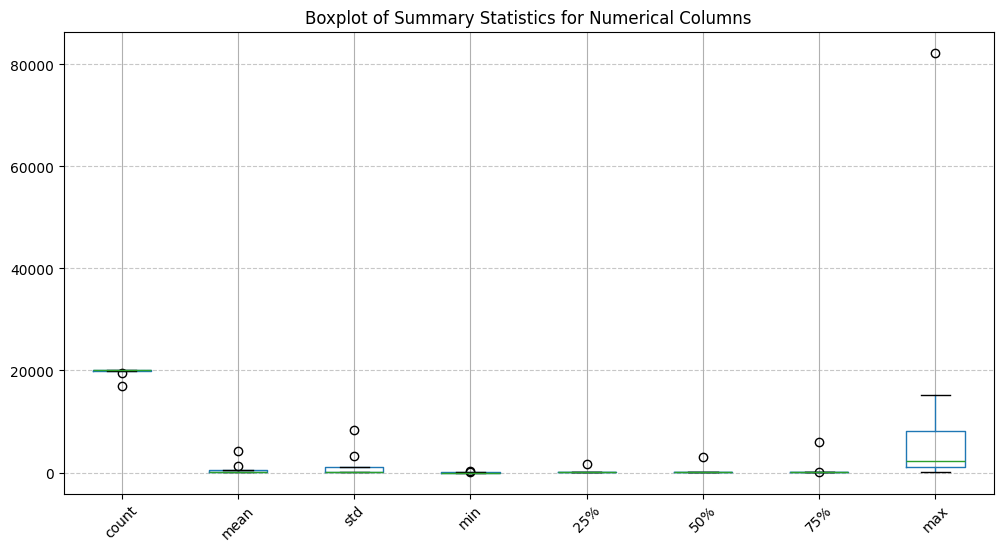

In [ ]:
# Generate summary statistics using & Visualize the distribution of statistics with boxplots.
print("Summary statistics for numerical columns:")
display(df.describe())
plt.figure(figsize=(12, 6))
df.describe().T.boxplot()
plt.title("Boxplot of Summary Statistics for Numerical Columns")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The boxplot shows the distribution of summary statistics for numerical columns, highlighting potential outliers, particularly the 'max' value, which is much higher than others. The other statistics (count, mean, std) show less variation.

**3.5 Missing Values**

***3.5.1 Missing Value Counts***

Detect missing values in the dataset.

In [ ]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
print("Missing value counts:\n", missing_counts)

Missing value counts:
 ID                             0
Customer_ID                    0
Month                          0
Name                        2056
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       3004
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                2339
Delay_from_due_date            0
Num_of_Delayed_Payment      1457
Changed_Credit_Limit           0
Num_Credit_Inquiries         430
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1846
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      871
Payment_Behaviour              0
Monthly_Balance              226
Credit_Score                   0
dtype: int64


In [ ]:
# percentage missing number
print("Percentage of missing values:\n", missing_percent)

Percentage of missing values:
 ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                        10.280
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.020
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.695
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.285
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         2.150
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.230
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.355
Payment_Behaviour            0.000
Monthly_Balance              1.130
Credit_Score            

***3.5.2 Missing Value Visualization***

Identify patterns of missing data

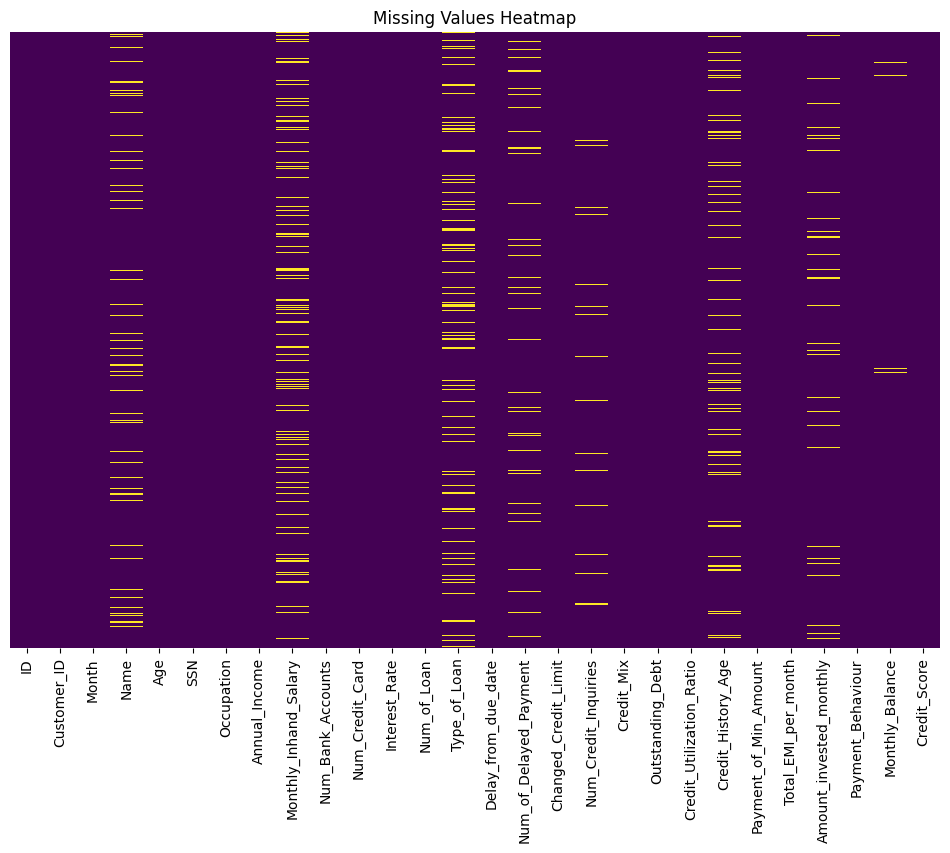

In [ ]:
# Generate a heatmap of missing value
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

**3.6 Duplicate Rows Analysis**

***3.6.1 Duplicate Detection***

 Identify duplicate records in the dataset.

In [ ]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_count

0

***3.6.2 Duplicate Visualization***

Visualize the proportion of duplicates.

Number of duplicate rows: 0


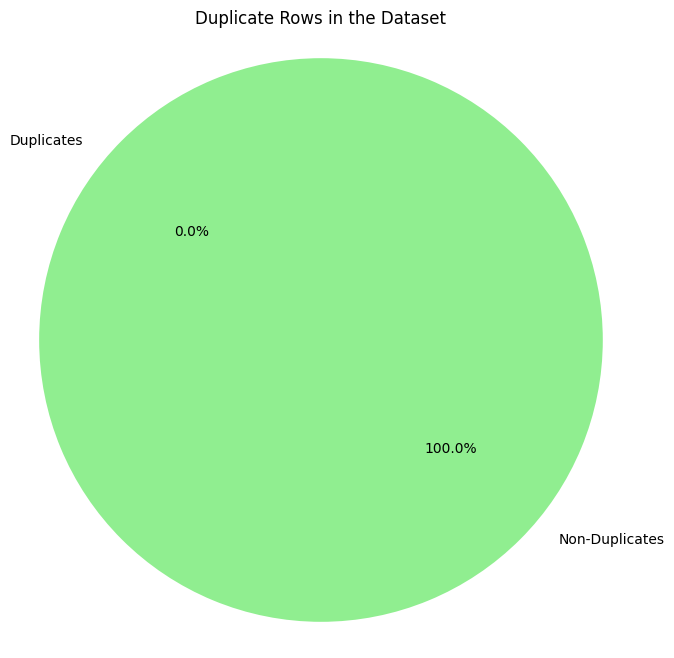

In [ ]:
# Plot a pie chart to show the proportion of duplicates vs. non-duplicates
print("Number of duplicate rows:", duplicate_count)
plt.figure(figsize=(8, 8))
plt.pie([duplicate_count, len(df) - duplicate_count], labels=['Duplicates', 'Non-Duplicates'], autopct='%1.1f%%',
        colors=['skyblue', 'lightgreen'], startangle=140)
plt.title("Duplicate Rows in the Dataset")
plt.axis('equal')
plt.show()

**3.7 Numerical Feature Distribution Analysis**


Examine the distribution of numerical columns.

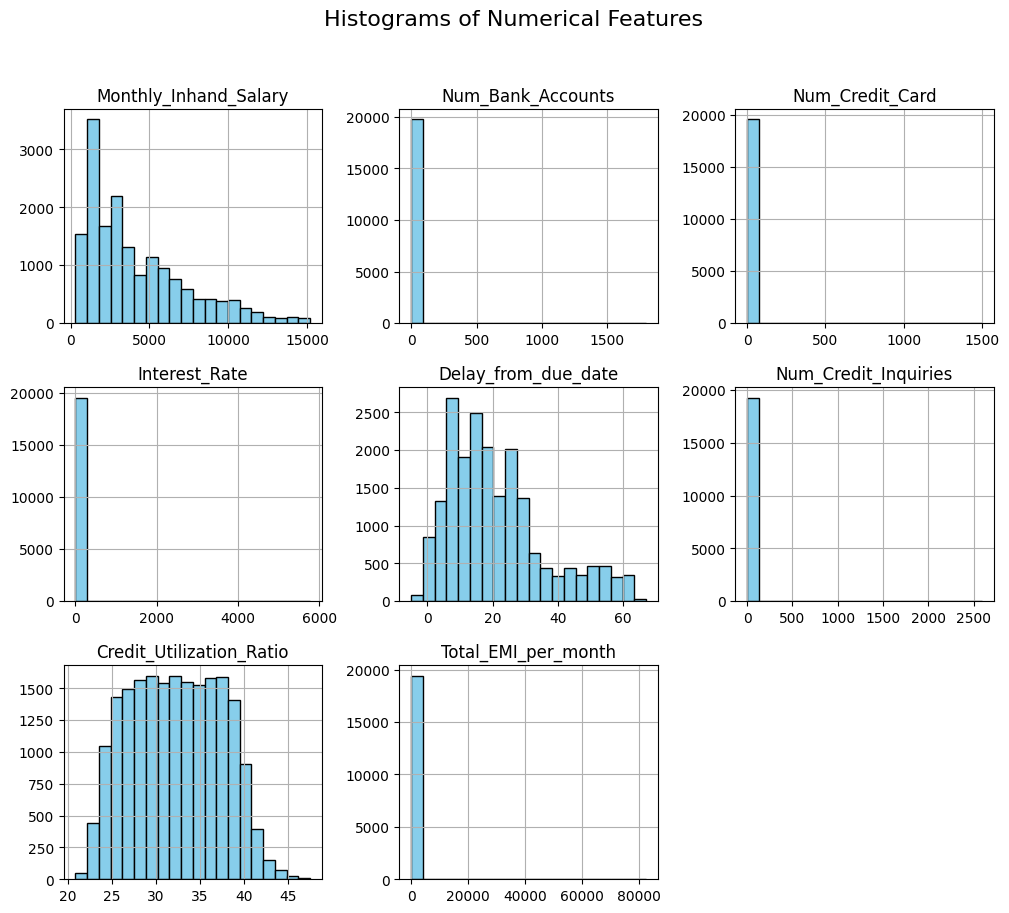

In [ ]:
# Generate histograms for numerical features.
df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

The histograms show the distribution of numerical features. Some columns, like "Interest_Rate" and "Num_Credit_Card," have highly skewed distributions, while others, like "Delay_from_due_date" and "Credit_Utilization_Ratio," show more normal-like distributions.

**3.8. Correlation Matrix**

 Identify relationships between numerical features.

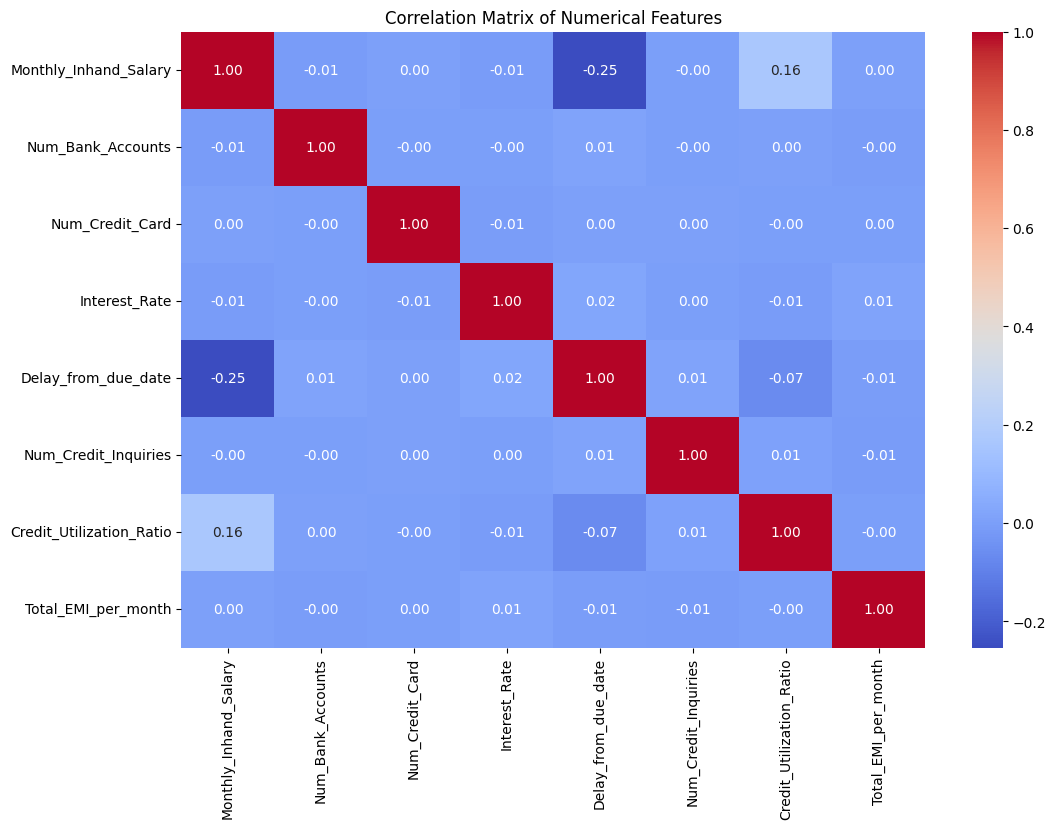

In [ ]:
# Compute the correlation matrix.
# Visualize the matrix using a heatmap
numerical_df = df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

The correlation matrix shows that most features have weak relationships with each other. "Delay_from_due_date" is slightly negatively related to "Monthly_Inhand_Salary," and "Credit_Utilization_Ratio" has a small positive correlation with "Monthly_Inhand_Salary."

**3.9. Target Variable Analysis**

Understand the distribution of the target variable.

Credit_Score
Standard    10715
Poor         5801
Good         3484
Name: count, dtype: int64


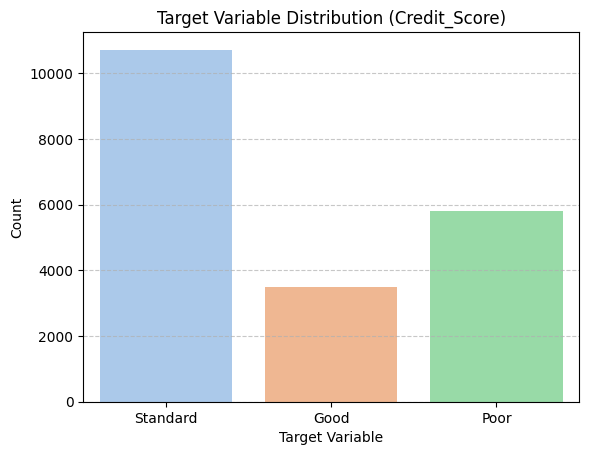

In [ ]:
# bar chart of the target distribution.
target_variable = 'Credit_Score'
print(df[target_variable].value_counts())
sns.countplot(x=target_variable, data=df, palette='pastel')
plt.title(f"Target Variable Distribution ({target_variable})")
plt.xlabel("Target Variable")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3.10. Outlier Detection**

Detect and visualize outliers in numerical columns.

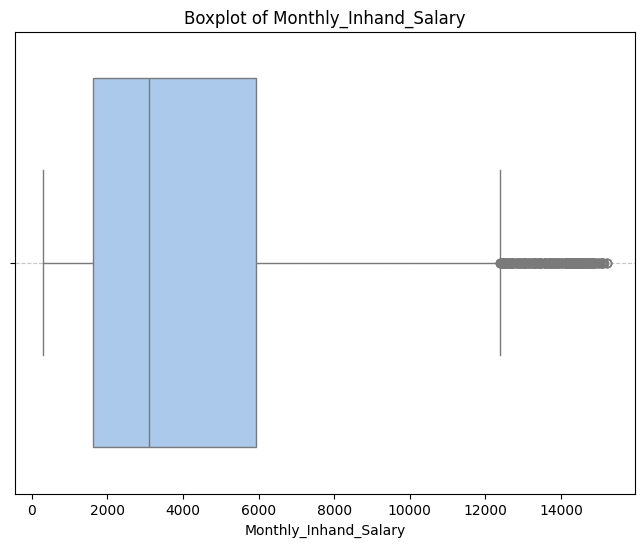

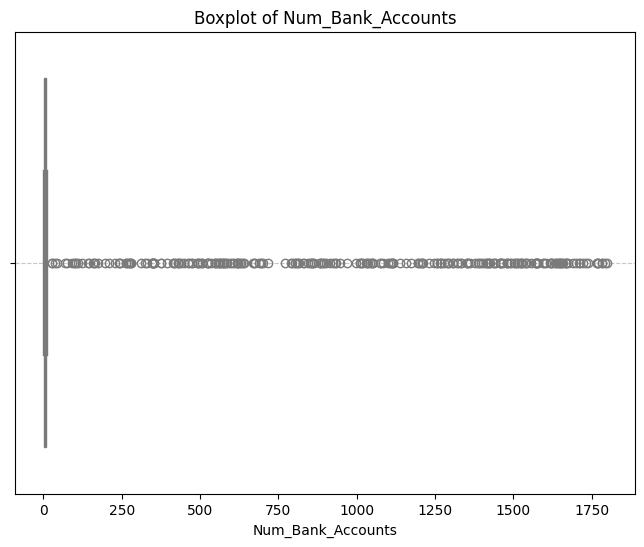

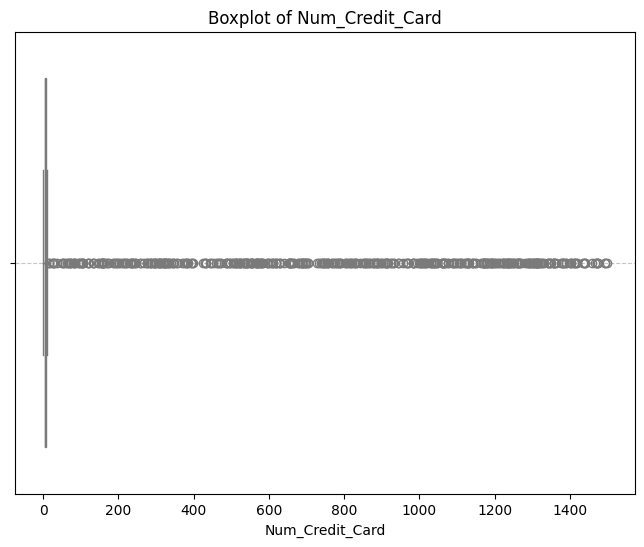

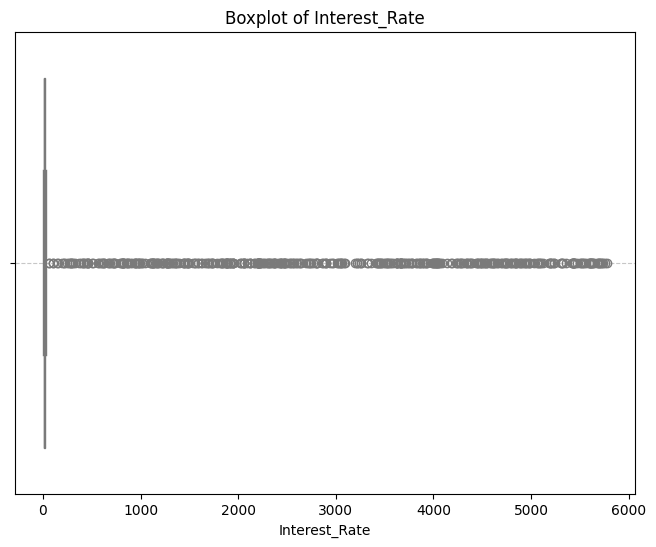

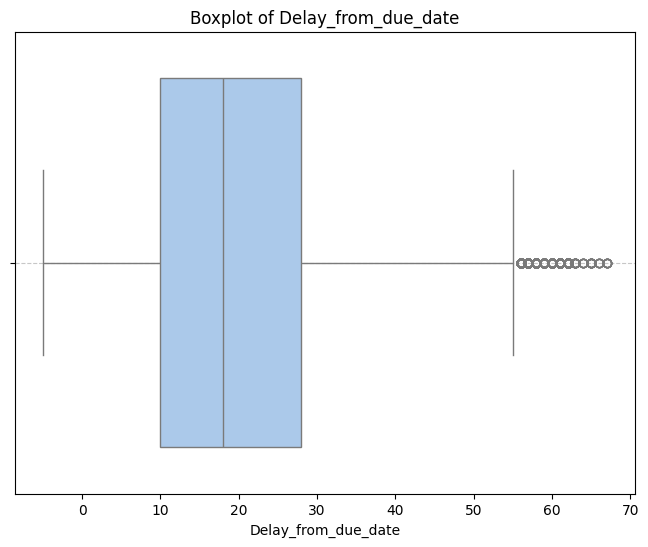

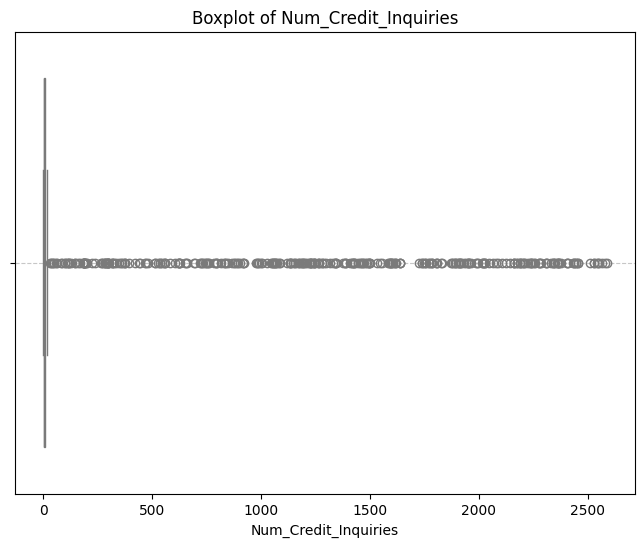

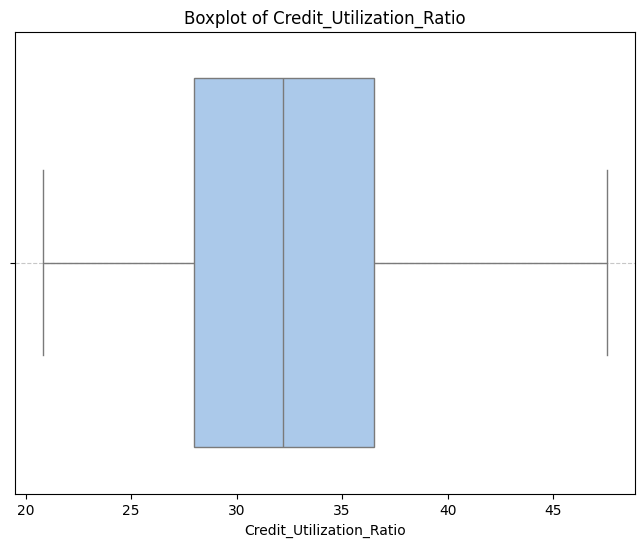

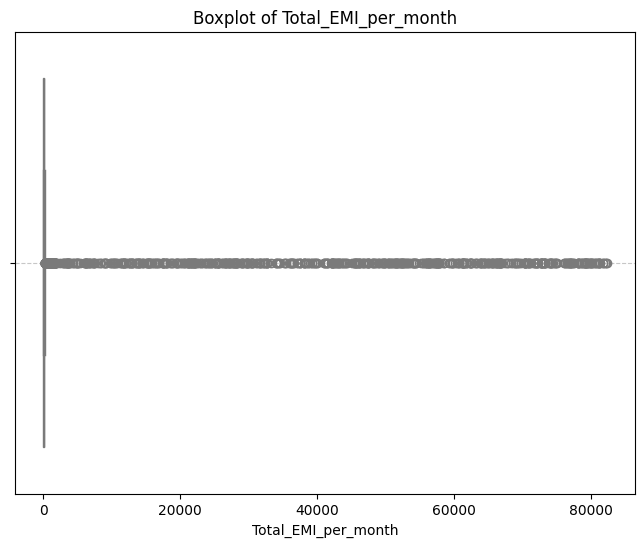

In [ ]:
# boxplots for each numerical column to highlight outliers.
numerical_columns = df.select_dtypes(include=np.number).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col, palette='pastel')
    plt.title(f"Boxplot of {col}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

**3.11. High Cardinality Check in Categorical Columns**

Identify columns with many unique categories.

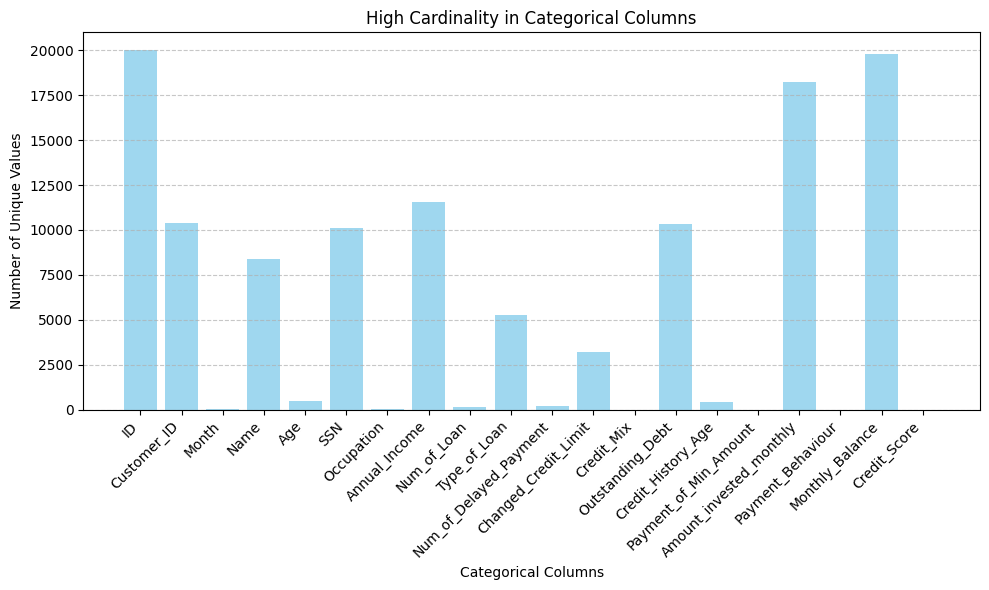

In [ ]:
# Count unique values for each categorical column & Visualize the counts using a bar chart.
categorical_columns = df.select_dtypes(include='object').columns
unique_values_counts = {col: df[col].nunique() for col in categorical_columns}
plt.figure(figsize=(10, 6))
plt.bar(unique_values_counts.keys(), unique_values_counts.values(), color='skyblue', alpha=0.8)
plt.title('High Cardinality in Categorical Columns')
plt.ylabel('Number of Unique Values')
plt.xlabel('Categorical Columns')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.12. Special Character Analysis**

**Identify Columns with Special Characters**

Detect columns containing special characters.

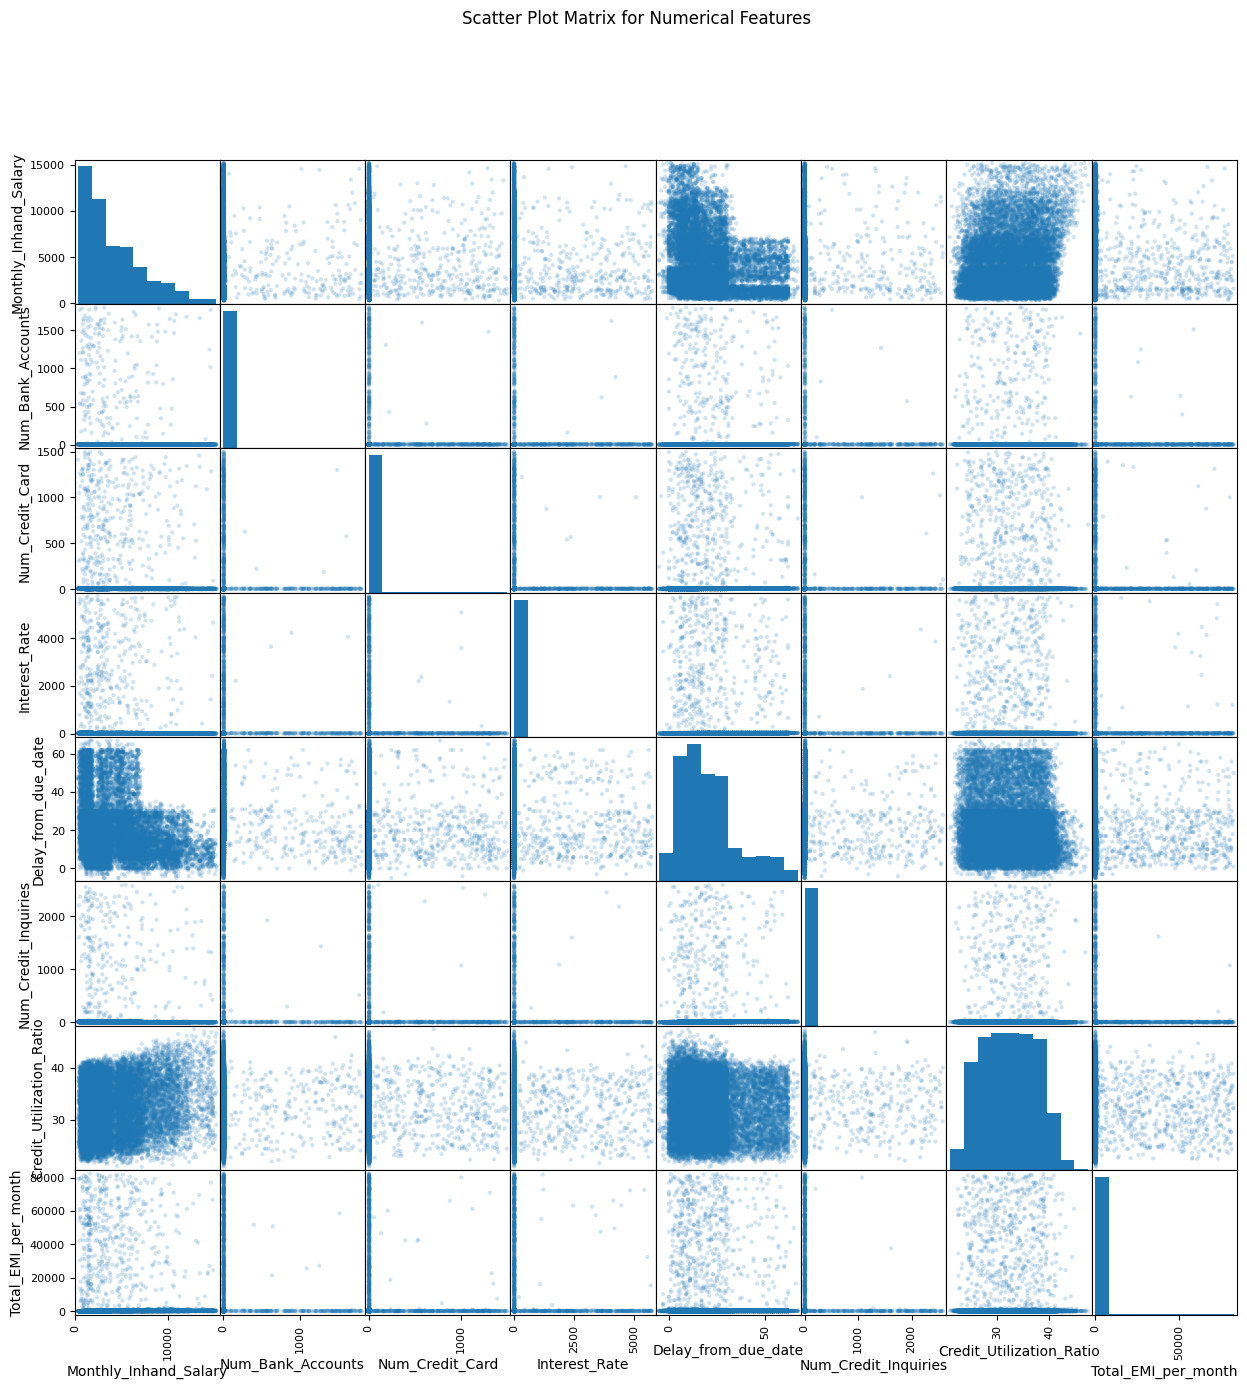

In [ ]:
# Plot a horizontal bar chart to show the presence of special characters with the use of
# regex patterns to search for non-alphanumeric characters in categorical columns.
scatter_matrix(df.select_dtypes(include=np.number), alpha=0.2, diagonal='hist', figsize=(15, 15))
plt.suptitle("Scatter Plot Matrix for Numerical Features")
plt.show()

**3.13. Feature Interaction Analysis**

***3.13.1. Boxplots Across Target Variable***

Analyze feature distributions grouped by the target variable

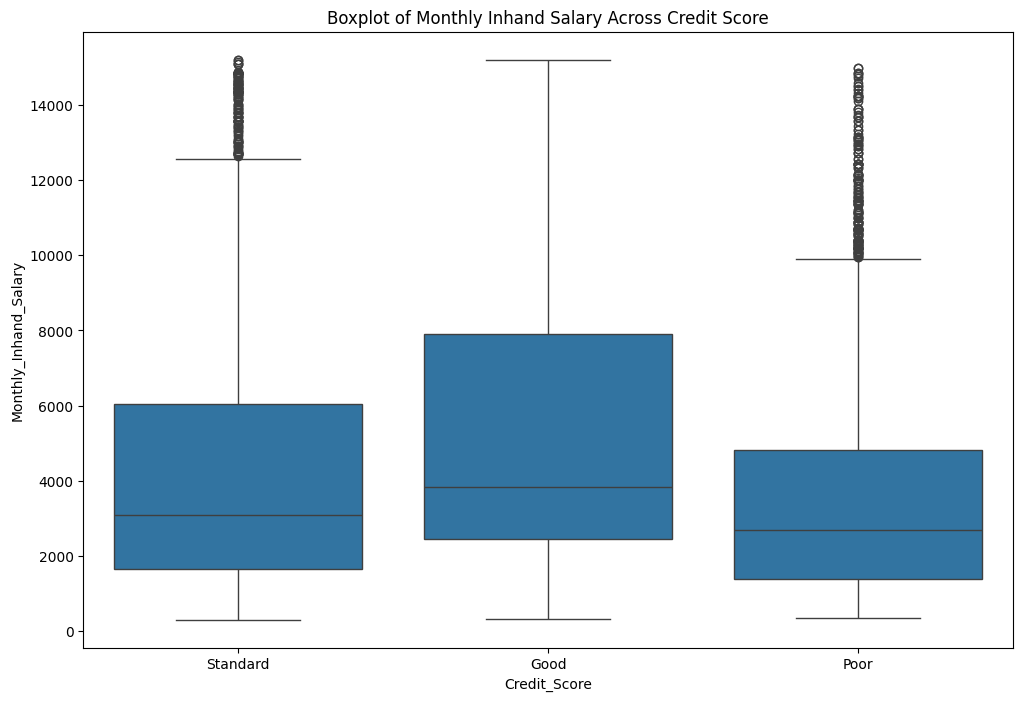

In [ ]:
# Create a boxplot to visualize the distribution of Monthly Inhand Salary across different Credit Scores.
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Credit_Score', y='Monthly_Inhand_Salary')

plt.title('Boxplot of Monthly Inhand Salary Across Credit Score')
plt.show()

The boxplot shows that individuals with a "Standard" credit score tend to have the highest monthly salaries, followed by those with a "Good" credit score. Those with a "Poor" credit score generally have lower monthly salaries. There are outliers in all groups with exceptionally high salaries.

***3.13.2 Analysis of Income, Salary, Loan Numbers, and Credit Scores***

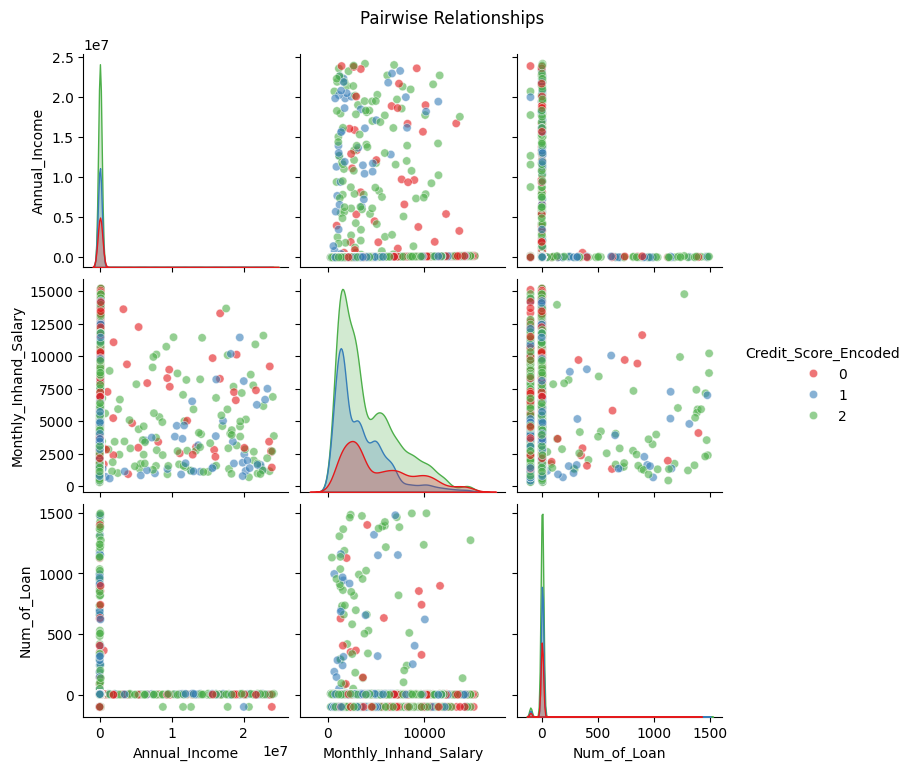

In [ ]:
# Preprocess data by encoding categorical variables and converting relevant columns to numeric,
#then visualize pairwise relationships using a pairplot.
encoder = LabelEncoder()
df['Credit_Score_Encoded'] = encoder.fit_transform(df['Credit_Score'])
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
sns.pairplot(df,
             vars=["Annual_Income", "Monthly_Inhand_Salary", "Num_of_Loan"],
             hue="Credit_Score_Encoded",
             palette="Set1",
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

The pairplot shows that individuals with higher credit scores (0 and 1) generally have higher annual incomes and monthly salaries.

***3.13.4. Relationship Between Monthly Balance, Annual Income, and Credit Score***

In [ ]:
#  Annual_Income and Monthly_Balance are numeric
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

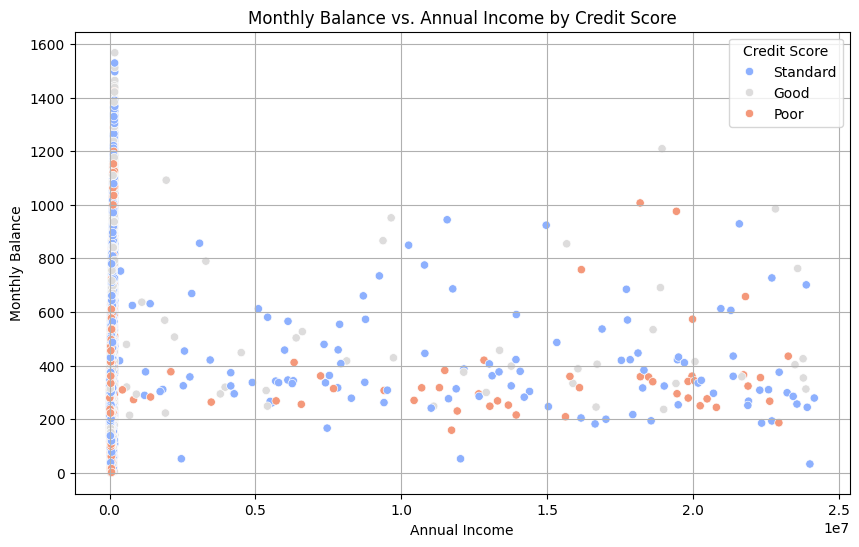

In [ ]:
# Scatterplot showing Monthly Balance vs. Annual Income by Credit Score.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Annual_Income", y="Monthly_Balance", hue="Credit_Score", palette="coolwarm")
plt.title("Monthly Balance vs. Annual Income by Credit Score")
plt.xlabel("Annual Income")
plt.ylabel("Monthly Balance")
plt.grid()
plt.legend(title="Credit Score")
plt.show()

The scatterplot shows that people with Standard credit scores (represented by blue) generally have higher monthly balances, while those with Poor credit scores (represented by red) tend to have lower balances. People with Good credit scores (represented by grey) fall in between.

### **4. Data Preprocessing**

**4.1. Check for Missing Data**

In [ ]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 ID                             0
Customer_ID                    0
Month                          0
Name                        2056
Age                            0
SSN                            0
Occupation                     0
Annual_Income               1383
Monthly_Inhand_Salary       3004
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 1000
Type_of_Loan                2339
Delay_from_due_date            0
Num_of_Delayed_Payment      1457
Changed_Credit_Limit           0
Num_Credit_Inquiries         430
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1846
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      871
Payment_Behaviour              0
Monthly_Balance              230
Credit_Score                   0
Credit_Score_Encoded           0
dtype: int64


In [ ]:
# Check for the percentage of missing values
print("Percentage of missing values:\n", (df.isnull().sum() / len(df)) * 100)

Percentage of missing values:
 ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                        10.280
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                6.915
Monthly_Inhand_Salary       15.020
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  5.000
Type_of_Loan                11.695
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.285
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         2.150
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.230
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.355
Payment_Behaviour            0.000
Monthly_Balance              1.150
Credit_Score            

In [ ]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0





 **4.2. Data Type Correction**

In [ ]:
# Check unique value counts for each column to determine categorical vs. numerical
print("\nUnique Value Counts Per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Value Counts Per Column:
ID: 20000 unique values
Customer_ID: 10382 unique values
Month: 8 unique values
Name: 8379 unique values
Age: 491 unique values
SSN: 10136 unique values
Occupation: 16 unique values
Annual_Income: 10230 unique values
Monthly_Inhand_Salary: 9803 unique values
Num_Bank_Accounts: 248 unique values
Num_Credit_Card: 404 unique values
Interest_Rate: 448 unique values
Num_of_Loan: 102 unique values
Type_of_Loan: 5278 unique values
Delay_from_due_date: 73 unique values
Num_of_Delayed_Payment: 192 unique values
Changed_Credit_Limit: 3211 unique values
Num_Credit_Inquiries: 308 unique values
Credit_Mix: 4 unique values
Outstanding_Debt: 10319 unique values
Credit_Utilization_Ratio: 20000 unique values
Credit_History_Age: 404 unique values
Payment_of_Min_Amount: 3 unique values
Total_EMI_per_month: 9889 unique values
Amount_invested_monthly: 18259 unique values
Payment_Behaviour: 7 unique values
Monthly_Balance: 19770 unique values
Credit_Score: 3 unique values
Cr

In [ ]:
# Suggest column classification based on the number of unique values
print("\nColumn Classification Suggestion:")
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values < 20:  # Heuristic: Low unique values suggest categorical
        print(f"{col}: Likely Categorical ({unique_values} unique values)")
    elif df[col].dtype in ['float64', 'int64']:  # Numeric type suggests numerical
        print(f"{col}: Likely Numerical")
    else:
        print(f"{col}: Needs Further Inspection (type: {df[col].dtype})")


Column Classification Suggestion:
ID: Needs Further Inspection (type: object)
Customer_ID: Needs Further Inspection (type: object)
Month: Likely Categorical (8 unique values)
Name: Needs Further Inspection (type: object)
Age: Needs Further Inspection (type: object)
SSN: Needs Further Inspection (type: object)
Occupation: Likely Categorical (16 unique values)
Annual_Income: Likely Numerical
Monthly_Inhand_Salary: Likely Numerical
Num_Bank_Accounts: Likely Numerical
Num_Credit_Card: Likely Numerical
Interest_Rate: Likely Numerical
Num_of_Loan: Likely Numerical
Type_of_Loan: Needs Further Inspection (type: object)
Delay_from_due_date: Likely Numerical
Num_of_Delayed_Payment: Needs Further Inspection (type: object)
Changed_Credit_Limit: Needs Further Inspection (type: object)
Num_Credit_Inquiries: Likely Numerical
Credit_Mix: Likely Categorical (4 unique values)
Outstanding_Debt: Needs Further Inspection (type: object)
Credit_Utilization_Ratio: Likely Numerical
Credit_History_Age: Needs F

In [ ]:
# Check for mixed data types in columns that might have inconsistencies
print("\nPotential Issues with Columns (Mixed Data Types):")
for col in df.columns:
    unique_types = df[col].apply(type).nunique()
    if unique_types > 1:
        print(f"{col} contains mixed data types.")


Potential Issues with Columns (Mixed Data Types):
Name contains mixed data types.
Type_of_Loan contains mixed data types.
Num_of_Delayed_Payment contains mixed data types.
Credit_History_Age contains mixed data types.
Amount_invested_monthly contains mixed data types.


**4.3. Convert Categorical Columns to Appropriate Data Types**

In [ ]:
# List of categorical columns to process
categorical_columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score', 'Type_of_Loan']

In [ ]:
# Process each categorical column
for col in categorical_columns:
    if col in df.columns:
        print(f"\nProcessing column: {col}")
        print("Unique values:", df[col].unique())


Processing column: Month
Unique values: ['March' 'August' 'June' 'April' 'May' 'January' 'July' 'February']

Processing column: Occupation
Unique values: ['Engineer' 'Musician' 'Writer' 'Mechanic' 'Lawyer' 'Media_Manager'
 'Doctor' 'Scientist' 'Teacher' 'Entrepreneur' 'Journalist' 'Accountant'
 '_______' 'Developer' 'Manager' 'Architect']

Processing column: Credit_Mix
Unique values: ['_' 'Bad' 'Good' 'Standard']

Processing column: Payment_of_Min_Amount
Unique values: ['No' 'Yes' 'NM']

Processing column: Payment_Behaviour
Unique values: ['Low_spent_Small_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Large_value_payments' '!@9#%8'
 'High_spent_Small_value_payments' 'High_spent_Medium_value_payments'
 'Low_spent_Medium_value_payments']

Processing column: Credit_Score
Unique values: ['Standard' 'Good' 'Poor']

Processing column: Type_of_Loan
Unique values: ['Personal Loan, Auto Loan, Student Loan, and Credit-Builder Loan'
 'Debt Consolidation Loan, Credit-Builder Loan,

**4.3.1. Month (Ordinal Encoding)**

In [ ]:
# Ordinal Encoding for 'Month'; Convert months to numbers based on their calendar order.
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
month_mapping = {month: i+1 for i, month in enumerate(month_order)}
df['Month_Encoded'] = df['Month'].map(month_mapping)

In [ ]:
# Drop the original 'Month' column.
df = df.drop(columns=['Month'])

**4.3.2. Occupation (Cleaning and One-Hot Encoding)**

In [ ]:
# Clean 'Occupation' column Replace invalid values and remove special characters.
df['Occupation'] = df['Occupation'].replace('_______', np.nan)
df['Occupation'] = df['Occupation'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

In [ ]:
# Fill missing values with the most frequent value (mode).
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])

In [ ]:
# One-hot encoding for 'Occupation'
occupation_dummies = pd.get_dummies(df['Occupation'], prefix='Occupation', dtype=int)
df = pd.concat([df, occupation_dummies], axis=1)
df.drop('Occupation', axis=1, inplace=True)

**4.3.3. Credit_Mix (Ordinal Encoding)**

In [ ]:
# Replace missing or invalid values and encode using ordinal encoding.
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)
df['Credit_Mix'] = df['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0])

In [ ]:
# Ordinal encoding: 'Bad' = 0, 'Standard' = 1, 'Good' = 2
credit_mix_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
df['Credit_Mix_Encoded'] = df['Credit_Mix'].map(credit_mix_mapping)
df.drop('Credit_Mix', axis=1, inplace=True)

**4.3.4. Credit_Score (Ordinal Encoding)**

In [ ]:
# Convert 'Credit_Score' into a numerical format.
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
df['Credit_Score_Encoded'] = df['Credit_Score'].map(credit_score_mapping)
df.drop('Credit_Score', axis=1, inplace=True)

**4.3.5. Payment_of_Min_Amount (Binary Encoding)**

In [ ]:
# Convert 'Payment_of_Min_Amount' from 'Yes/No' to 1/0.
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', 'No')
df['Payment_of_Min_Amount_Encoded'] = df['Payment_of_Min_Amount'].map({'No': 0, 'Yes': 1})
df.drop('Payment_of_Min_Amount', axis=1, inplace=True)

 **4.3.6 Payment_Behaviour (One-Hot Encoding)**

In [ ]:
# Handle invalid characters and apply one-hot encoding to 'Payment_Behaviour'.
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
payment_behaviour_dummies = pd.get_dummies(df['Payment_Behaviour'], prefix='Payment_Behaviour', dtype=int)
df = pd.concat([df, payment_behaviour_dummies], axis=1)
df.drop('Payment_Behaviour', axis=1, inplace=True)

**4.3.7. Type_of_Loan (Text Cleaning and One-Hot Encoding)**

In [ ]:
# Standardize loan types and create a new 'Loan_Type_Category' column.
df['Type_of_Loan'] = df['Type_of_Loan'].replace('Not Specified', 'Unknown_Loan_Type')
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(' and ', ',')
df['Loan_Type_Category'] = df['Type_of_Loan'].apply(lambda x: 'Combined Loan' if isinstance(x, str) and len(x.split(',')) > 1 else x)

In [ ]:
# One-hot encode 'Loan_Type_Category'.
loan_type_dummies = pd.get_dummies(df['Loan_Type_Category'], prefix='Loan_Type', dtype=int)
df = pd.concat([df, loan_type_dummies], axis=1)
df.drop('Loan_Type_Category', axis=1, inplace=True)
df.drop('Type_of_Loan', axis=1, inplace=True)

 **4.4. Handle Numerical Columns**

In [ ]:
# Function to convert "years and months" to total months
def convert_to_months(value):
    try:
        # Extract years and months using regex
        years = int(re.search(r'(\d+)\s*year', value).group(1)) if 'year' in value else 0
        months = int(re.search(r'(\d+)\s*month', value).group(1)) if 'month' in value else 0
        return years * 12 + months
    except:
        return np.nan  # Return NaN for invalid or missing values

In [ ]:
# Apply the conversion function to 'Credit_History_Age'
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

In [ ]:
# Check and handle missing values in 'Credit_History_Age'
print(f"Missing values in 'Credit_History_Age' after conversion: {df['Credit_History_Age'].isnull().sum()}")
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].median())  # Fill with median

Missing values in 'Credit_History_Age' after conversion: 1846


In [ ]:
# Convert numerical columns to appropriate formats and fill missing values if necessary.
numerical_columns = ['Annual_Income', 'Credit_History_Age', 'Num_of_Loan', 'Amount_invested_monthly',
                     'Num_of_Delayed_Payment', 'Monthly_Balance']

In [ ]:
# Convert columns to numeric values (for those that may have string representations)
for col in numerical_columns:
    # Convert the column to numeric, invalid parsing will be set to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Handle missing values for numerical columns.
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())  # Use median for imputation.

In [ ]:
# Convert 'Annual_Income' and other columns to numeric, if necessary.
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

In [ ]:
# Handling negative values for relevant columns
numerical_columns_with_negatives = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age','Outstanding_Debt']

In [ ]:
# Convert columns to numeric, forcing errors to NaN
for col in numerical_columns_with_negatives:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # This converts non-numeric to NaN
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)  # Replace negative values with NaN

In [ ]:
# Handle missing values for numerical columns, using median for imputation
for col in numerical_columns_with_negatives:
    if df[col].isnull().sum() > 0:
        print(f"Handling missing values for column: {col}")
        df[col] = df[col].fillna(df[col].median())

Handling missing values for column: Delay_from_due_date
Handling missing values for column: Num_of_Delayed_Payment
Handling missing values for column: Outstanding_Debt


In [ ]:
# Handling columns with special characters like '_'
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)

In [ ]:
# Handle missing values in 'Changed_Credit_Limit' by filling with median
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median())

In [ ]:
# Ensure columns are properly converted to numeric where necessary (e.g., Amount_invested_monthly)
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [ ]:
# Fill missing values for 'Amount_invested_monthly' with median
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())

In [ ]:
# Handle missing values for 'Monthly_Inhand_Salary'
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median())

In [ ]:
# Ensure 'Annual_Income' is numeric
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())

In [ ]:
# Handle missing values in 'Num_Credit_Inquiries'
if df['Num_Credit_Inquiries'].isnull().sum() > 0:
    print("Handling missing values for 'Num_Credit_Inquiries'")
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median())


Handling missing values for 'Num_Credit_Inquiries'


In [ ]:
# Example: Converting strings to numeric by removing unwanted characters
#df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')  # Remove underscores
#df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')  # Convert to numeric

**4.5. Check for Remaining Missing Values**

In [ ]:
print("\nRemaining missing values in dataset:")
print(df.isnull().sum())


Remaining missing values in dataset:
ID                                                       0
Customer_ID                                              0
Name                                                  2056
Age                                                      0
SSN                                                      0
Annual_Income                                            0
Monthly_Inhand_Salary                                    0
Num_Bank_Accounts                                        0
Num_Credit_Card                                          0
Interest_Rate                                            0
Num_of_Loan                                              0
Delay_from_due_date                                      0
Num_of_Delayed_Payment                                   0
Changed_Credit_Limit                                     0
Num_Credit_Inquiries                                     0
Outstanding_Debt                                         0
Credit_Utilization

**4.6. Identify if there are still Non-Numeric Columns**

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['ID', 'Customer_ID', 'Name', 'Age', 'SSN'], dtype='object')


**4.7. Remove Irrelevant Columns**

In [ ]:
# Drop columns that are not useful for modeling.
irrelevant_columns = ['ID', 'Customer_ID', 'Name', 'Age', 'SSN']
df = df.drop(columns=irrelevant_columns)

**4.8. Reorder the Columns**

In [ ]:
# Ensure 'Credit_Score_Encoded' is the last column in the dataset.
cols = [col for col in df.columns if col != 'Credit_Score_Encoded']
cols.append('Credit_Score_Encoded')
df = df[cols]

In [ ]:
df.head().T

0  \
Annual_Income                                       15330.305000   
Monthly_Inhand_Salary                                1135.525417   
Num_Bank_Accounts                                       4.000000   
Num_Credit_Card                                         5.000000   
Interest_Rate                                           5.000000   
Num_of_Loan                                             4.000000   
Delay_from_due_date                                    15.000000   
Num_of_Delayed_Payment                                 19.000000   
Changed_Credit_Limit                                    9.030000   
Num_Credit_Inquiries                                    4.000000   
Outstanding_Debt                                      672.490000   
Credit_Utilization_Ratio                               32.991519   
Credit_History_Age                                      0.000000   
Total_EMI_per_month                                    46.388945   
Amount_invested_monthly                                65.974120   
Monthly_Balance                                       291.189477   
Month_Encoded                                           3.000000   
Occupation_Accountant                                   0.000000   
Occupation_Architect                                    0.000000   
Occupation_Developer                                    0.000000   
Occupation_Doctor                                       0.000000   
Occupation_Engineer                                     1.000000   
Occupation_Entrepreneur                                 0.000000   
Occupation_Journalist                                   0.000000   
Occupation_Lawyer                                       0.000000   
Occupation_Manager                                      0.000000   
Occupation_Mechanic                                     0.000000   
Occupation_MediaManager                                 0.000000   
Occupation_Musician                                     0.000000   
Occupation_Scientist                                    0.000000   
Occupation_Teacher                                      0.000000   
Occupation_Writer                                       0.000000   
Credit_Mix_Encoded                                      1.000000   
Payment_of_Min_Amount_Encoded                           0.000000   
Payment_Behaviour_High_spent_Large_value_payments       0.000000   
Payment_Behaviour_High_spent_Medium_value_payments      0.000000   
Payment_Behaviour_High_spent_Small_value_payments       0.000000   
Payment_Behaviour_Low_spent_Large_value_payments        0.000000   
Payment_Behaviour_Low_spent_Medium_value_payments       0.000000   
Payment_Behaviour_Low_spent_Small_value_payments        1.000000   
Loan_Type_Auto Loan                                     0.000000   
Loan_Type_Combined Loan                                 1.000000   
Loan_Type_Credit-Builder Loan                           0.000000   
Loan_Type_Debt Consolidation Loan                       0.000000   
Loan_Type_Home Equity Loan                              0.000000   
Loan_Type_Mortgage Loan                                 0.000000   
Loan_Type_Payday Loan                                   0.000000   
Loan_Type_Personal Loan                                 0.000000   
Loan_Type_Student Loan                                  0.000000   
Loan_Type_Unknown_Loan_Type                             0.000000   
Credit_Score_Encoded                                    1.000000   

                                                               1  \
Annual_Income                                       73314.600000   
Monthly_Inhand_Salary                                6180.550000   
Num_Bank_Accounts                                      10.000000   
Num_Credit_Card                                         8.000000   
Interest_Rate                                          20.000000   
Num_of_Loan                                             8.000000   
Delay_from_due_date                               

**4.9. Save the Cleaned Data**

In [ ]:
df.to_csv('cleaned_data.csv', index=False)
print("Cleaned data saved to 'Cleaned_CCdata_v2.csv'")

Cleaned data saved to 'Cleaned_CCdata_v2.csv'


In [ ]:
# Check for missing values in each column of the DataFrame
df.isna().sum()

Annual_Income                                         0
Monthly_Inhand_Salary                                 0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Interest_Rate                                         0
Num_of_Loan                                           0
Delay_from_due_date                                   0
Num_of_Delayed_Payment                                0
Changed_Credit_Limit                                  0
Num_Credit_Inquiries                                  0
Outstanding_Debt                                      0
Credit_Utilization_Ratio                              0
Credit_History_Age                                    0
Total_EMI_per_month                                   0
Amount_invested_monthly                               0
Monthly_Balance                                       0
Month_Encoded                                         0
Occupation_Accountant                                 0
Occupation_Architect                                  0
Occupation_Developer                                  0
Occupation_Doctor                                     0
Occupation_Engineer                                   0
Occupation_Entrepreneur                               0
Occupation_Journalist                                 0
Occupation_Lawyer                                     0
Occupation_Manager                                    0
Occupation_Mechanic                                   0
Occupation_MediaManager                               0
Occupation_Musician                                   0
Occupation_Scientist                                  0
Occupation_Teacher                                    0
Occupation_Writer                                     0
Credit_Mix_Encoded                                    0
Payment_of_Min_Amount_Encoded                         0
Payment_Behaviour_High_spent_Large_value_payments     0
Payment_Behaviour_High_spent_Medium_value_payments    0
Payment_Behaviour_High_spent_Small_value_payments     0
Payment_Behaviour_Low_spent_Large_value_payments      0
Payment_Behaviour_Low_spent_Medium_value_payments     0
Payment_Behaviour_Low_spent_Small_value_payments      0
Loan_Type_Auto Loan                                   0
Loan_Type_Combined Loan                               0
Loan_Type_Credit-Builder Loan                         0
Loan_Type_Debt Consolidation Loan                     0
Loan_Type_Home Equity Loan                            0
Loan_Type_Mortgage Loan                               0
Loan_Type_Payday Loan                                 0
Loan_Type_Personal Loan                               0
Loan_Type_Student Loan                                0
Loan_Type_Unknown_Loan_Type                           0
Credit_Score_Encoded                                  0
dtype: int64

In [ ]:
# Check the data types of each column in the DataFrame
df.dtypes

Annual_Income                                         float64
Monthly_Inhand_Salary                                 float64
Num_Bank_Accounts                                       int64
Num_Credit_Card                                         int64
Interest_Rate                                           int64
Num_of_Loan                                           float64
Delay_from_due_date                                   float64
Num_of_Delayed_Payment                                float64
Changed_Credit_Limit                                  float64
Num_Credit_Inquiries                                  float64
Outstanding_Debt                                      float64
Credit_Utilization_Ratio                              float64
Credit_History_Age                                    float64
Total_EMI_per_month                                   float64
Amount_invested_monthly                               float64
Monthly_Balance                                       float64
Month_Encoded                                           int64
Occupation_Accountant                                   int64
Occupation_Architect                                    int64
Occupation_Developer                                    int64
Occupation_Doctor                                       int64
Occupation_Engineer                                     int64
Occupation_Entrepreneur                                 int64
Occupation_Journalist                                   int64
Occupation_Lawyer                                       int64
Occupation_Manager                                      int64
Occupation_Mechanic                                     int64
Occupation_MediaManager                                 int64
Occupation_Musician                                     int64
Occupation_Scientist                                    int64
Occupation_Teacher                                      int64
Occupation_Writer                                       int64
Credit_Mix_Encoded                                      int64
Payment_of_Min_Amount_Encoded                           int64
Payment_Behaviour_High_spent_Large_value_payments       int64
Payment_Behaviour_High_spent_Medium_value_payments      int64
Payment_Behaviour_High_spent_Small_value_payments       int64
Payment_Behaviour_Low_spent_Large_value_payments        int64
Payment_Behaviour_Low_spent_Medium_value_payments       int64
Payment_Behaviour_Low_spent_Small_value_payments        int64
Loan_Type_Auto Loan                                     int64
Loan_Type_Combined Loan                                 int64
Loan_Type_Credit-Builder Loan                           int64
Loan_Type_Debt Consolidation Loan                       int64
Loan_Type_Home Equity Loan                              int64
Loan_Type_Mortgage Loan                                 int64
Loan_Type_Payday Loan                                   int64
Loan_Type_Personal Loan                                 int64
Loan_Type_Student Loan                                  int64
Loan_Type_Unknown_Loan_Type                             int64
Credit_Score_Encoded                                    int64
dtype: object

### **5. Outlier Detection and Removal using Interquartile Range (IQR) Method**

Based on the comparison of different outlier detection techniques, including Z-score, IQR, and others, the IQR method provided the best results when tested on various models for thercredit score prediction project.

In [ ]:
# Extract numerical columns from dataframe (df)
numerical_columns = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
    'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
    'Month_Encoded'
]

In [ ]:
# Extract features (X) and target (y)
X = df[numerical_columns]
y = df["Credit_Score_Encoded"]

In [ ]:
# IQR Method for Outlier Detection and Removal
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Remove outliers
#X_clean_z = X[~np.any(outliers_z, axis=1)]
#y_clean_z = y[~np.any(outliers_z, axis=1)]

In [ ]:
# Calculate z-scores for each data point
z_scores = np.abs(stats.zscore(X))

# Define a threshold for outliers (e.g., z-score > 3)
z_score_threshold = 3

# Identify outliers based on the threshold
outliers_z = (z_scores > z_score_threshold)

# Remove outliers
X_clean_z = X[~np.any(outliers_z, axis=1)]
y_clean_z = y[~np.any(outliers_z, axis=1)]

In [ ]:
# Detect outliers based on IQR
iqr_outliers = ((X < lower_bound) | (X > upper_bound))

In [ ]:
# Remove rows with outliers
X_clean_iqr = X[~np.any(iqr_outliers, axis=1)]
y_clean_iqr = y[~np.any(iqr_outliers, axis=1)]

### **6. Standardize the Data**

**Since PCA and UMAP are sensitive to the scale of the features, it is important to standardize the data**

Based on the comparison of different standardization techniques tested, including Z-score scaling, MinMax scaling, and StandardScaler, the StandardScaler method provided the best results when applied to various models for the credit score prediction project.

In [ ]:
# Step 2: Standardize the data (using StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean_iqr)

### **7. Handle Imbalance Class Target**

In this section, we apply three different techniques to handle class imbalance: SMOTE, Under-sampling, and Over-sampling. **Over-sampling** on the** PCA dataset** yielded the highest accuracy, which was then used in the modeling process

***7.3. Apply OVER SAMPLE to Handle Class Imbalance:***

RandomOverSampler to handle class imbalance by increasing the minority class size

In [ ]:
ros = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to the data
X_over, y_over = ros.fit_resample(X_scaled, y_clean_iqr)

### **8. Apply Dimensionality Reduction (PCA and UMAP)**

Dimensionality reduction helps reduce the dataset to two dimensions for easier visualization and to apply subsequent models.

**8.1. Visualizing the Data Using PCA:**

In [ ]:
# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(X_over)

# Create a scatter plot of the PCA results
fig = px.scatter(x=embedding_pca[:, 0], y=embedding_pca[:, 1], color=y_over.astype(int))
fig.show()

**8.2. Visualizing the Data Using UMAP:**

In [ ]:
# Apply UMAP to reduce the dataset to 2 dimensions
reducer = umap.UMAP(random_state=42)
embedding_umap = reducer.fit_transform(X_over)

# Create a scatter plot of the UMAP results
fig = px.scatter(x=embedding_umap[:, 0], y=embedding_umap[:, 1], color=y_over.astype(int))
fig.show()

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning:

The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.



### **8.3.Train and Evaluate using a Decision Tree Classifier:**

**8.3.1.Evaluating the Classifier on PCA-Reduced Data:**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embedding_pca, y_over, test_size=0.3, random_state=42)

# Train a Decision Tree classifier on the PCA embedding
clf = tree.DecisionTreeClassifier(criterion='entropy')
initial = time.time()
clf = clf.fit(X_train, y_train)

# Evaluate on PCA-reduced data
print("Results for DT on PCA Embedding")
print("Training time:", time.time() - initial)
print("Accuracy:", metrics.accuracy_score(y_test, clf.predict(X_test)))

Results for DT on PCA Embedding
Training time: 0.07556295394897461
Accuracy: 0.7841820861306698


**8.3.2. Evaluating the Classifier on UMAP-Reduced Data:**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embedding_umap, y_over, test_size=0.3, random_state=42)

# Train a Decision Tree classifier on the UMAP embedding
clf = tree.DecisionTreeClassifier(criterion='entropy')
initial = time.time()
clf = clf.fit(X_train, y_train)

# Evaluate on UMAP-reduced data
print("Results for DT on UMAP data")
print("Training time:", time.time() - initial)
print("Accuracy:", metrics.accuracy_score(y_test, clf.predict(X_test)))

Results for DT on UMAP data
Training time: 0.0943446159362793
Accuracy: 0.701653839855903


**8.3.3 Save the Dimensionality Reduced Data to CSV**

In [ ]:
# For PCA
pca_df = pd.DataFrame(embedding_pca, columns=['PCA1', 'PCA2'])
pca_df['Credit_Score_Encoded'] = y_over  # Including the target variable

# For UMAP
umap_df = pd.DataFrame(embedding_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Credit_Score_Encoded'] = y_over  # Including the target variable

# Save the PCA or UMAP reduced data to CSV
pca_df.to_csv("pca_reduced_data.csv", index=False)
umap_df.to_csv("umap_reduced_data.csv", index=False)

print("PCA-reduced data saved to 'pca_reduced_data.csv'.")
print("UMAP-reduced data saved to 'umap_reduced_data.csv'.")

PCA-reduced data saved to 'pca_reduced_data.csv'.
UMAP-reduced data saved to 'umap_reduced_data.csv'.


### **9. Supervised Machine Model Development**

Compare different models trained on PCA-reduced data (Oversampled data).

**9.1. Logistic Regression**

In [ ]:
# Split the PCA-reduced data into train, validation, and test sets
X_train, X_rem, y_train, y_rem = train_test_split(embedding_pca, y_over, train_size=0.6, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [ ]:
# Train a Logistic Regression classifier on the PCA-reduced training data
clf = LogisticRegression(max_iter=1000)
initial = time.time()
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate the model on the validation set
y_pred_valid = clf.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy on PCA-reduced data: {accuracy_valid:.4f}")

Validation Accuracy on PCA-reduced data: 0.6772


In [ ]:
# Evaluate the model on the test set
y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy on PCA-reduced data using LR: {accuracy_test:.4f}")
print(classification_report(y_test, y_pred_test))

Test Accuracy on PCA-reduced data using LR: 0.6657
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1374
           1       0.62      0.49      0.55      1391
           2       0.62      0.80      0.70      1306

    accuracy                           0.67      4071
   macro avg       0.67      0.67      0.66      4071
weighted avg       0.67      0.67      0.66      4071



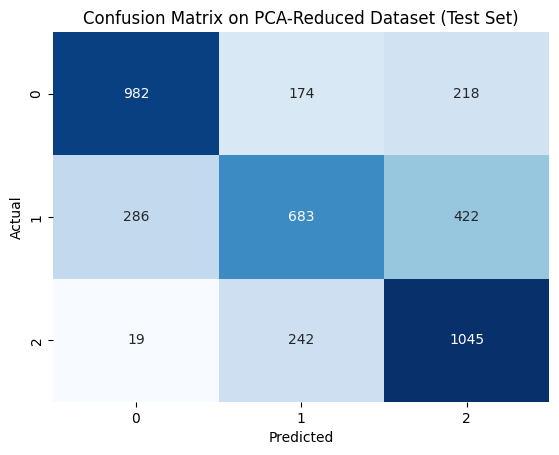

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix on PCA-Reduced Dataset (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**9.2. Random Forest Model**

In [ ]:
# Train a Random Forest classifier on the PCA-reduced training data
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
initial = time.time()

In [ ]:
# Train the model
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model on the validation set
y_pred_valid = clf_rf.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy on PCA-reduced data using Random Forest: {accuracy_valid:.4f}")

Validation Accuracy on PCA-reduced data using Random Forest: 0.7983


In [ ]:
# Evaluate the model on the test set
y_pred_test = clf_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy on PCA-reduced data using Random Forest: {accuracy_test:.4f}")
print(classification_report(y_test, y_pred_test))

Test Accuracy on PCA-reduced data using Random Forest: 0.7932
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1374
           1       0.80      0.60      0.68      1391
           2       0.78      0.94      0.85      1306

    accuracy                           0.79      4071
   macro avg       0.79      0.80      0.79      4071
weighted avg       0.79      0.79      0.79      4071



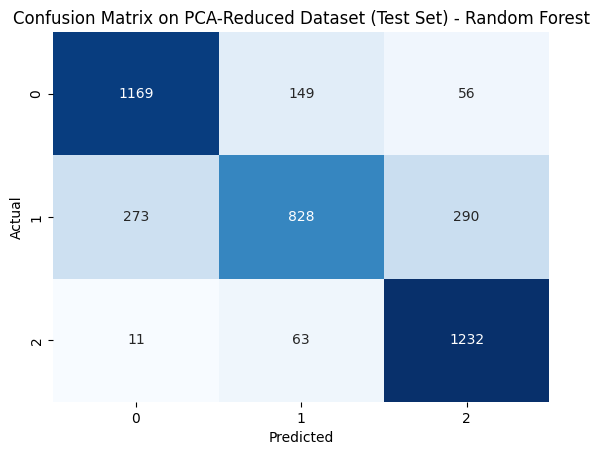

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix on PCA-Reduced Dataset (Test Set) - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**9.3. KNeighborsClassifier Model**

In [ ]:
# Train a KNeighborsClassifier on the PCA-reduced training data
clf_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
initial = time.time()

In [ ]:
# Train the model
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluate the model on the validation set
y_pred_valid = clf_knn.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy on PCA-reduced data using KNN: {accuracy_valid:.4f}")

Validation Accuracy on PCA-reduced data using KNN: 0.6731


In [ ]:
# Evaluate the model on the test set
y_pred_test = clf_knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy on PCA-reduced data using KNN: {accuracy_test:.4f}")
print(classification_report(y_test, y_pred_test))

Test Accuracy on PCA-reduced data using KNN: 0.6618
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1374
           1       0.61      0.48      0.54      1391
           2       0.66      0.77      0.71      1306

    accuracy                           0.66      4071
   macro avg       0.66      0.66      0.66      4071
weighted avg       0.66      0.66      0.66      4071



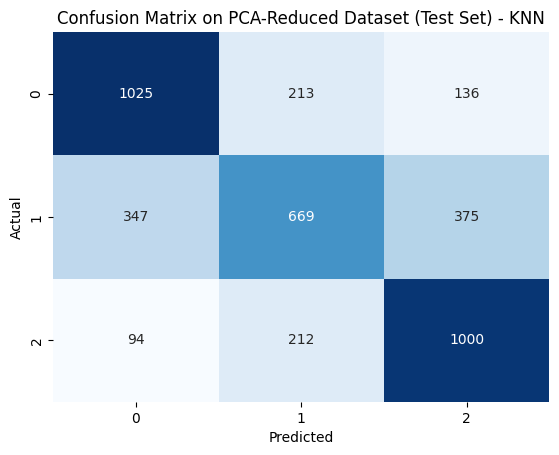

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix on PCA-Reduced Dataset (Test Set) - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**9.4. Naive Bayes Classifier Model**

In [ ]:
# Train a Naive Bayes classifier (GaussianNB) on the PCA-reduced training data
clf_nb = GaussianNB()
initial = time.time()

In [ ]:
# Train the model
clf_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Evaluate the model on the validation set
y_pred_valid = clf_nb.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy on PCA-reduced data using Naive Bayes: {accuracy_valid:.4f}")

Validation Accuracy on PCA-reduced data using Naive Bayes: 0.6465


In [ ]:
# Evaluate the model on the test set
y_pred_test = clf_nb.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy on PCA-reduced data using Naive Bayes: {accuracy_test:.4f}")
print(classification_report(y_test, y_pred_test))

Test Accuracy on PCA-reduced data using Naive Bayes: 0.6451
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1374
           1       0.63      0.37      0.47      1391
           2       0.57      0.88      0.69      1306

    accuracy                           0.65      4071
   macro avg       0.66      0.65      0.63      4071
weighted avg       0.66      0.65      0.63      4071



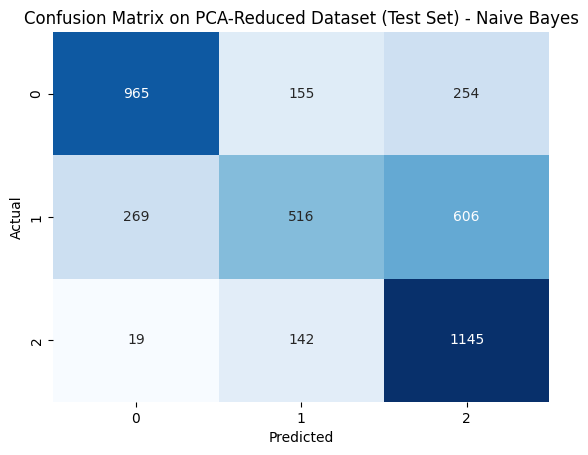

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix on PCA-Reduced Dataset (Test Set) - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**9.5. XGBoost Classifier Model**

In [ ]:
# Train an XGBoost classifier using the XGBoost
clf_xgb = xgb.XGBClassifier(eval_metric='mlogloss', objective='multi:softmax', num_class=len(set(y_over)), random_state=42)
initial = time.time()

In [ ]:
clf_xgb.fit(X_train, y_train)

# Evaluate on validation and test sets
y_pred_valid = clf_xgb.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy: {accuracy_valid:.4f}")

Validation Accuracy: 0.7249


In [ ]:
# Evaluate the model on the test set
y_pred_test = clf_xgb.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy on PCA-reduced data using XGBoost: {accuracy_test:.4f}")
print(classification_report(y_test, y_pred_test))

Test Accuracy on PCA-reduced data using XGBoost: 0.7097
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1374
           1       0.66      0.57      0.61      1391
           2       0.69      0.84      0.76      1306

    accuracy                           0.71      4071
   macro avg       0.71      0.71      0.71      4071
weighted avg       0.71      0.71      0.71      4071



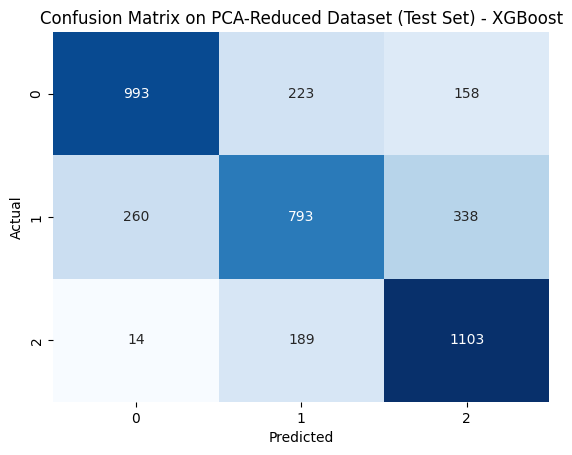

In [ ]:
# Step 5: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix on PCA-Reduced Dataset (Test Set) - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**9.6. SVM Classifier Model**

In [ ]:
# Train an SVM classifier on the PCA-reduced training data
clf_svm = SVC(kernel='linear', random_state=42)  # Using a linear kernel
initial = time.time()

In [ ]:
# Train the model
clf_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Evaluate the model on the validation set
y_pred_valid = clf_svm.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy on PCA-reduced data using SVM: {accuracy_valid:.4f}")

Validation Accuracy on PCA-reduced data using SVM: 0.6777


In [ ]:
# Evaluate the model on the test set
y_pred_test = clf_svm.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy on PCA-reduced data using SVM: {accuracy_test:.4f}")
print(classification_report(y_test, y_pred_test))

Test Accuracy on PCA-reduced data using SVM: 0.6649
              precision    recall  f1-score   support

           0       0.78      0.70      0.73      1374
           1       0.61      0.52      0.56      1391
           2       0.63      0.78      0.70      1306

    accuracy                           0.66      4071
   macro avg       0.67      0.67      0.66      4071
weighted avg       0.67      0.66      0.66      4071



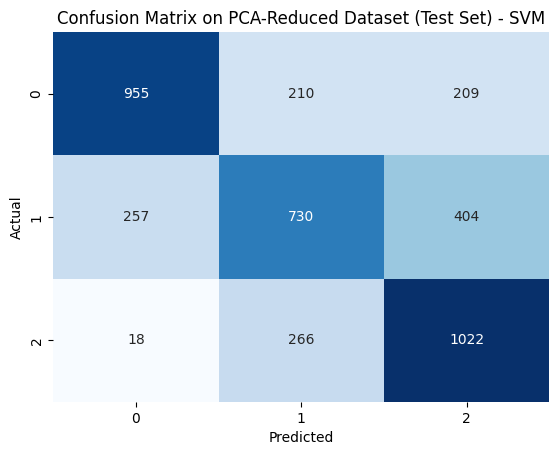

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix on PCA-Reduced Dataset (Test Set) - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**9.7.  Decision Tree Classifier Model**

In [ ]:
# Train a Decision Tree Classifier on the PCA-reduced training data
clf_dt = DecisionTreeClassifier(random_state=42)
initial = time.time()

In [ ]:
# Train the model
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluate the model on the validation set
y_pred_valid = clf_dt.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Validation Accuracy on PCA-reduced data using DTC: {accuracy_valid:.4f}")

Validation Accuracy on PCA-reduced data using DTC: 0.7573


In [ ]:
# Step 4: Evaluate the model on the test set
y_pred_test = clf_dt.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy on PCA-reduced data using DTC: {accuracy_test:.4f}")
print(classification_report(y_test, y_pred_test))

Test Accuracy on PCA-reduced data using DTC: 0.7576
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1374
           1       0.74      0.56      0.64      1391
           2       0.78      0.90      0.84      1306

    accuracy                           0.76      4071
   macro avg       0.76      0.76      0.75      4071
weighted avg       0.75      0.76      0.75      4071



**9.2. Model Comparison for Unsupervised Models**

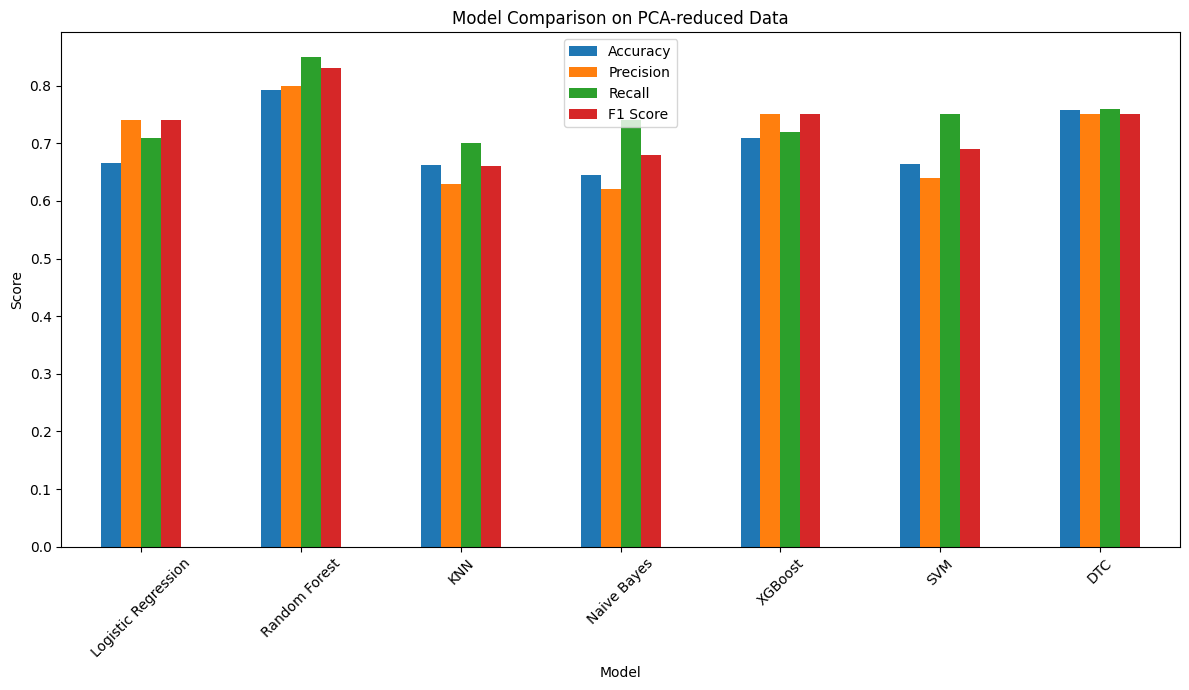

In [ ]:
# Model names and their performance metrics (including all models you provided)
models = ['Logistic Regression', 'Random Forest','KNN', 'Naive Bayes', 'XGBoost', 'SVM', 'DTC']
accuracy = [0.6657, 0.7932, 0.6618, 0.6451, 0.7097, 0.6647, 0.7576]
precision = [0.74, 0.80, 0.63, 0.62, 0.75, 0.64, 0.75]
recall = [0.71, 0.85, 0.70, 0.74, 0.72, 0.75, 0.76]
f1_score = [0.74, 0.83, 0.66, 0.68, 0.75, 0.69, 0.75]

# Prepare the data into a DataFrame
data = {
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the bar chart
df.set_index('Model').plot(kind='bar', figsize=(12, 7))

# Adding title and labels
plt.title('Model Comparison on PCA-reduced Data')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

This chart compares the performance of six different models (Random Forest, KNN, Naive Bayes, SVM, and Decision Tree Classifier) on PCA-reduced data. It shows how each model performs across four metrics: Accuracy, Precision, Recall, and F1 Score. Random Forest and Decision Tree perform the best overall, with the highest accuracy and strong scores across all metrics. Naive Bayes and KNN perform the weakest, especially in recall for class 1.

### **10. Supervised Machine Model Development Clustering (Unsupervised Learning)**


**10.1. KMeans Clustering using Silhouette Score**

In [ ]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(embedding_pca)
    wcss.append(kmeans.inertia_)

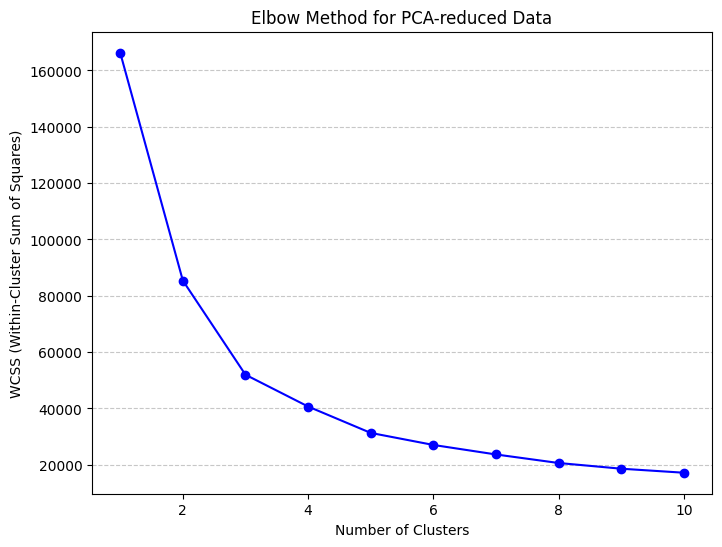

In [ ]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method for PCA-reduced Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# From the Elbow plot, choose the optimal number of clusters
 # Based on the turning 2 give the best values
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)

In [ ]:
# Fit the KMeans model and predict the cluster labels
cluster_labels = kmeans.fit_predict(embedding_pca)

In [ ]:
# Print cluster centers and labels
print(f"Cluster Labels for PCA-reduced Data: {cluster_labels}")
print(f"Cluster Centers for PCA-reduced Data:\n{kmeans.cluster_centers_}")

Cluster Labels for PCA-reduced Data: [2 2 0 ... 2 2 2]
Cluster Centers for PCA-reduced Data:
[[-1.95046292  2.32301629]
 [ 2.91508987  0.29432229]
 [-1.10184734 -1.07322293]]


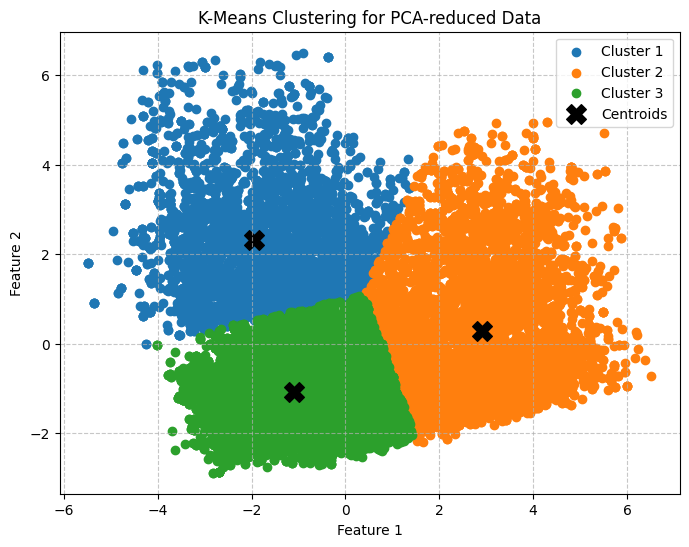

In [ ]:
# Plot the clusters and their centers
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    plt.scatter(
        embedding_pca[cluster_labels == cluster, 0],
        embedding_pca[cluster_labels == cluster, 1],
        label=f'Cluster {cluster + 1}'
    )
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='black',
    s=200,
    marker='X',
    label='Centroids'
)
plt.title('K-Means Clustering for PCA-reduced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Calculate and print the Silhouette Score
silhouette_avg = silhouette_score(embedding_pca, cluster_labels)
print(f"Silhouette Score for PCA-reduced Data: {silhouette_avg:.3f}")

Silhouette Score for PCA-reduced Data: 0.470


**10.2. Hierarchical Clustering**


Processing dataset: Normal

Number of clusters (undefined): 20355
Minimum distance: 0.0 | Maximum distance: 398.8571468716663


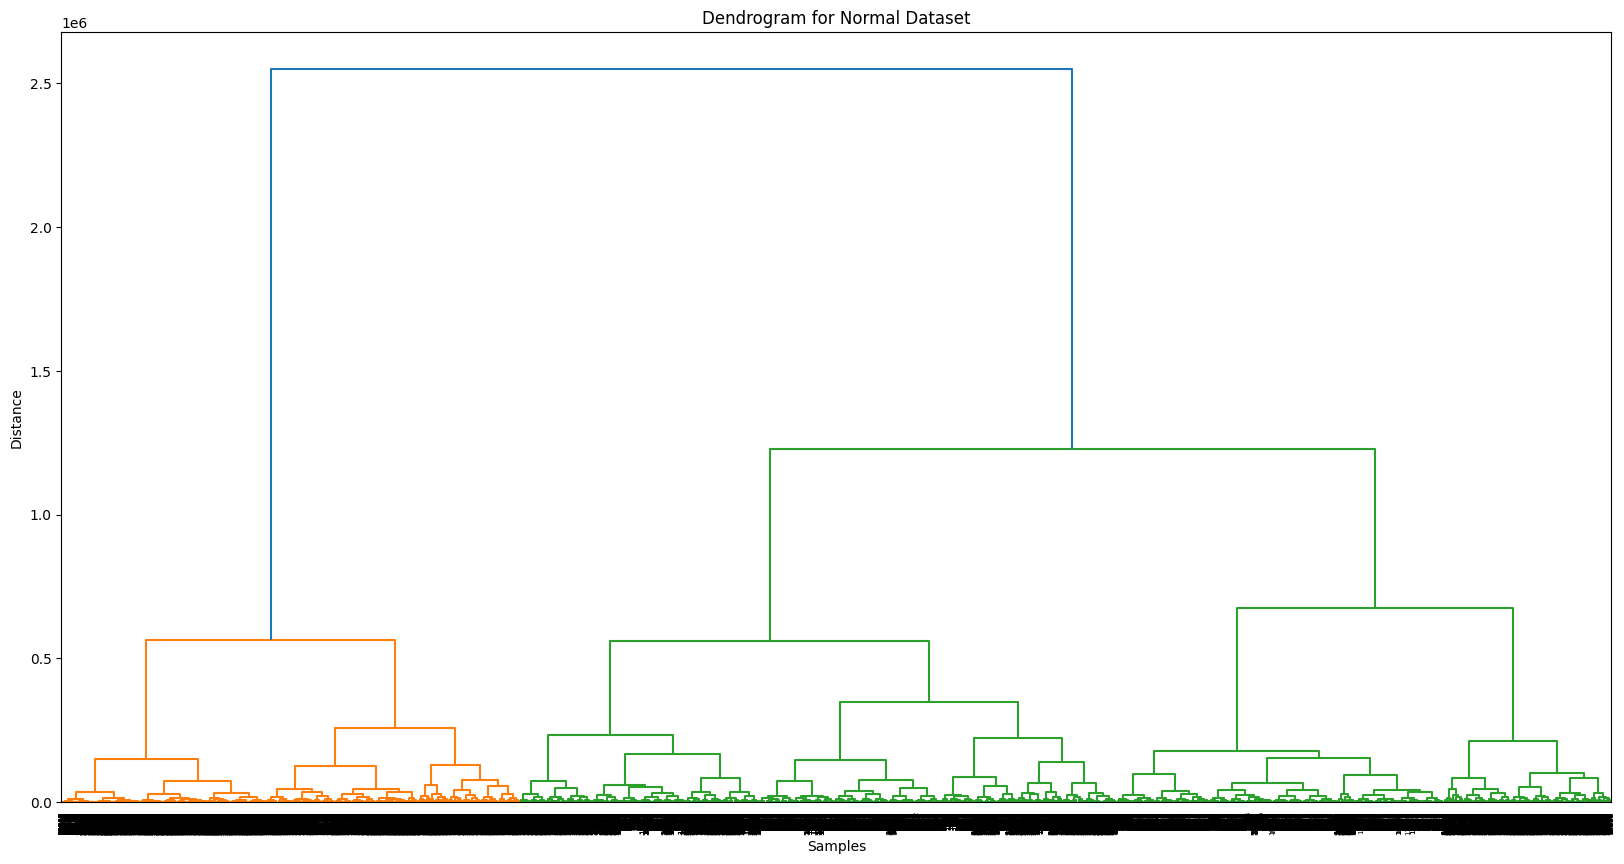

Number of clusters formed at threshold 0.8: 775

Processing dataset: Oversampled

Number of clusters (undefined): 20355
Minimum distance: 0.0 | Maximum distance: 391.1240978998048


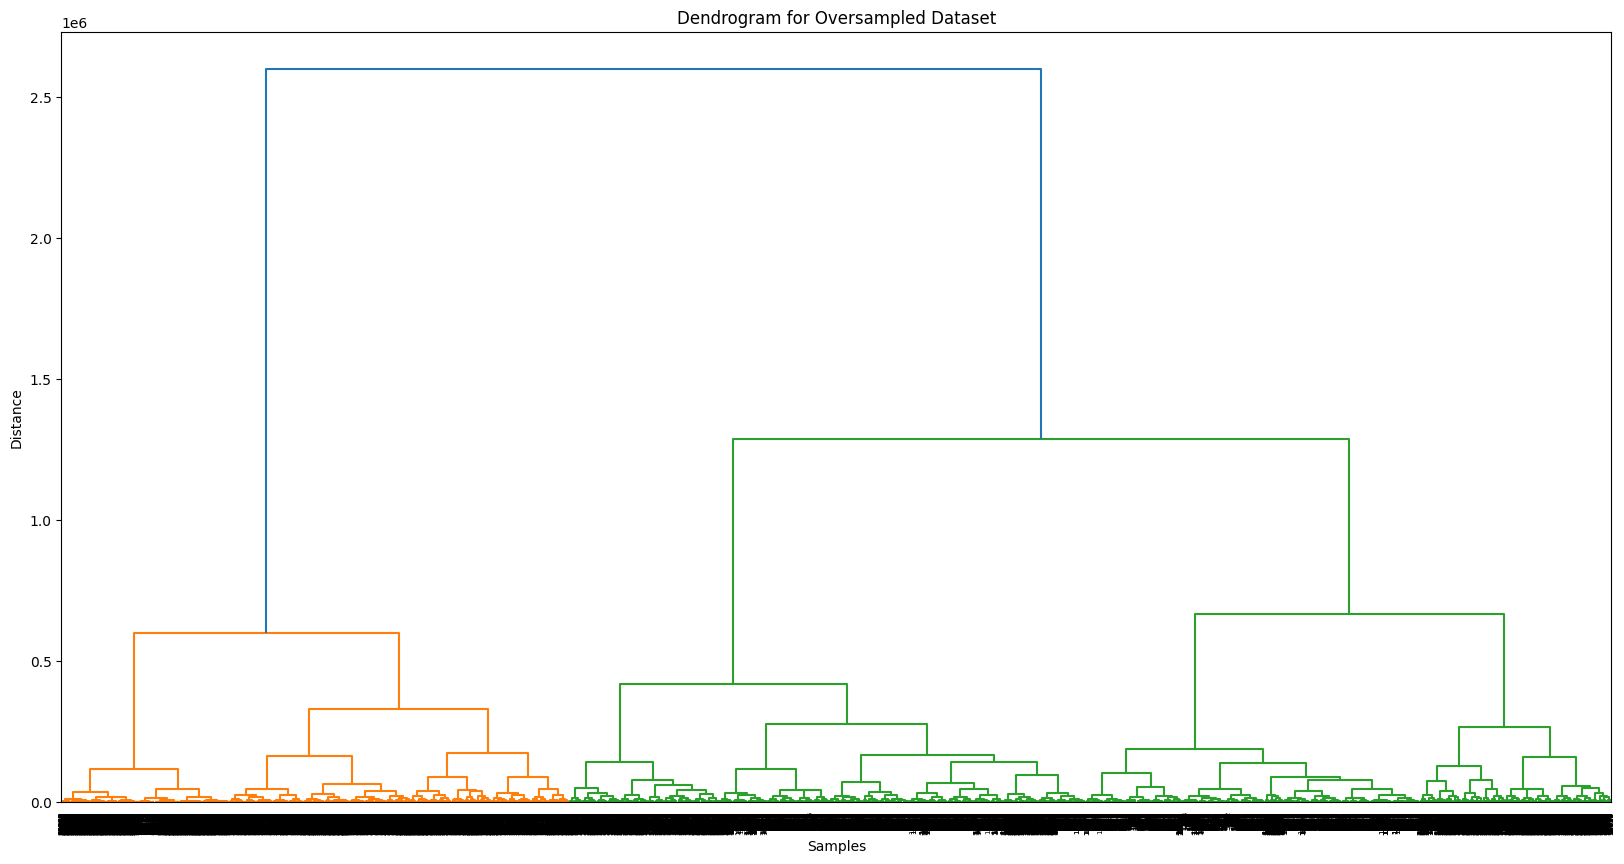

Number of clusters formed at threshold 0.8: 12310


In [ ]:
# Datasets to process Normal and Oversampled
datasets = {
    "Normal": embedding_pca,
    "Oversampled": X_over
}

# Loop through each dataset and perform hierarchical clustering
for name, data in datasets.items():
    print(f"\nProcessing dataset: {name}\n")

    # Initialize the AgglomerativeClustering model with no predefined clusters
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

    # Fit the model to the current dataset
    model = model.fit(data)

    # Extract the number of clusters (initially undefined)
    print(f"Number of clusters (undefined): {model.n_clusters_}")

    # Compute the distances between clusters
    distances = model.distances_
    print(f"Minimum distance: {distances.min()} | Maximum distance: {distances.max()}")

    # Create the linkage matrix for dendrogram plotting
    Z = hierarchy.linkage(model.children_, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(20, 10))
    plt.title(f"Dendrogram for {name} Dataset")
    hierarchy.dendrogram(Z)
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

    # Adjust the distance threshold to form clusters (example: threshold=0.8)
    model_adjusted = AgglomerativeClustering(distance_threshold=0.8, n_clusters=None)
    model_adjusted = model_adjusted.fit(data)

    # Print the number of clusters formed at the adjusted threshold
    print(f"Number of clusters formed at threshold 0.8: {model_adjusted.n_clusters_}")


**10.3. Model Comparison for UnSupervised Hierarchical Clustering**

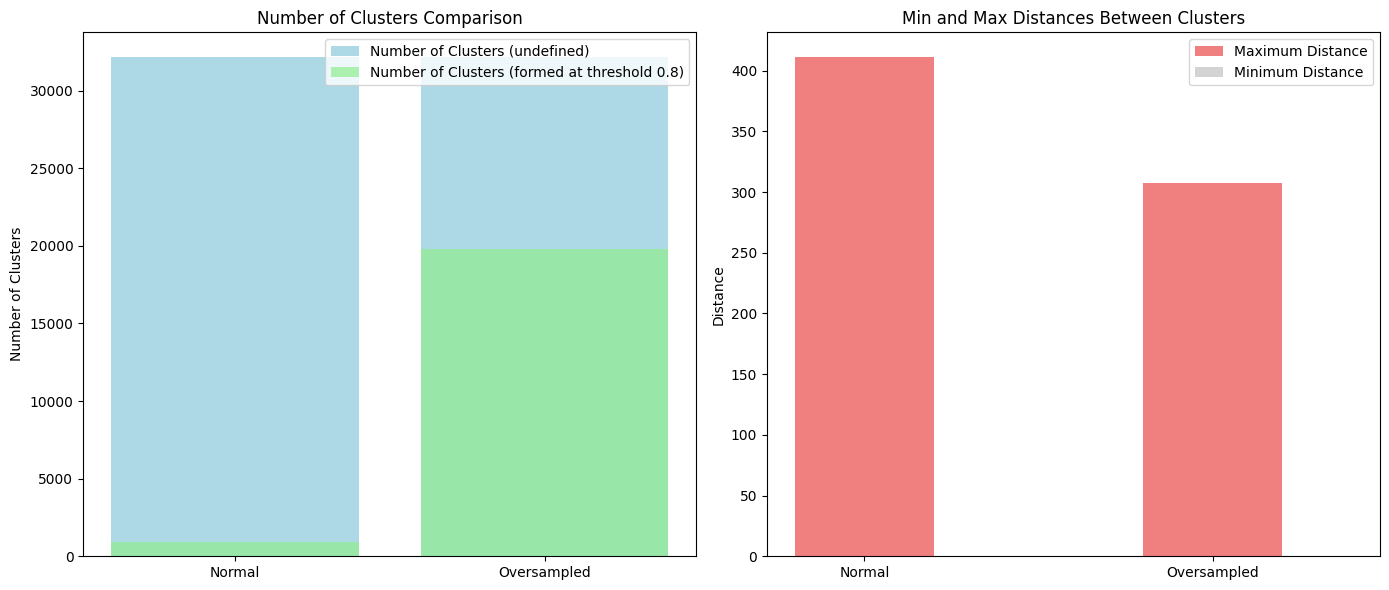

In [ ]:
# Data to be visualized
datasets = ['Normal', 'Oversampled']
num_clusters_undefined = [32145, 32145]
min_distances = [0.0, 0.0]
max_distances = [411.03, 307.84]
num_clusters_formed = [926, 19783]

# Create a figure and set of subplots for clusters and distances comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for clusters and distances (Number of clusters undefined and formed)
ax[0].bar(datasets, num_clusters_undefined, color='lightblue', label='Number of Clusters (undefined)')
ax[0].bar(datasets, num_clusters_formed, color='lightgreen', label='Number of Clusters (formed at threshold 0.8)', alpha=0.7)
ax[0].set_ylabel('Number of Clusters')
ax[0].set_title('Number of Clusters Comparison')
ax[0].legend()

# Plotting the distances (min and max)
ax[1].bar(datasets, max_distances, color='lightcoral', label='Maximum Distance', width=0.4, align='center')
ax[1].bar(datasets, min_distances, color='lightgray', label='Minimum Distance', width=0.4, align='edge')
ax[1].set_ylabel('Distance')
ax[1].set_title('Min and Max Distances Between Clusters')
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

The chart compares the number of clusters and distances between clusters for the Normal and Oversampled datasets. The left plot shows the number of undefined and formed clusters, with a significant increase in the number of clusters after applying the 0.8 threshold for the "Oversampled" dataset. The right plot illustrates the minimum and maximum distances between clusters, highlighting a larger maximum distance in the Normal dataset compared to the Oversampled dataset.

## **11. Ensemble Learning Techniques**

**11.1 Bagging (Bootstrap Aggregating)**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

In [ ]:
# k-Fold Cross-Validation
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

# Bagging with Decision Trees
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=7)

# Get cross-validated predicted probabilities
y_pred_prob = cross_val_predict(model, X_over, y_over, cv=kfold, method='predict_proba')

# Accuracy Calculation using cross_val_score (mean accuracy)
accuracy_results = model_selection.cross_val_score(model, X_over, y_over, cv=kfold)
accuracy = accuracy_results.mean()
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.8855301622393961


***11.1a.AUC-ROC Curve for Bagging Classifier***

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

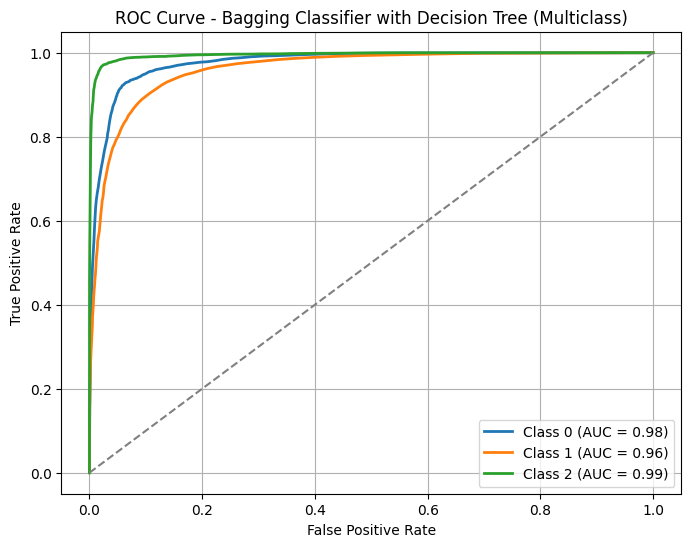

Macro-average AUC-ROC Score: 0.99


In [ ]:
# Binarize the target labels for multiclass classification
y_bin = label_binarize(y_over, classes=[0, 1, 2])  # Adjust based on your classes
n_classes = y_bin.shape[1]

# Get the predicted probabilities for each class
y_pred_prob = cross_val_predict(model, X_over, y_over, cv=kfold, method='predict_proba')

# Initialize the plot
plt.figure(figsize=(8, 6))

# Compute and plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging Classifier with Decision Tree (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Compute the average AUC for all classes
macro_auc = auc(fpr, tpr)
print(f'Macro-average AUC-ROC Score: {macro_auc:.2f}')

**11.2. Boosting (AdaBoost)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classification
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_over, y_over, cv=kfold)
print("AdaBoost Accuracy:", results.mean())

AdaBoost Accuracy: 0.6693187490044071


***11.2a.AUC-ROC Curve for Boosting Classifier***

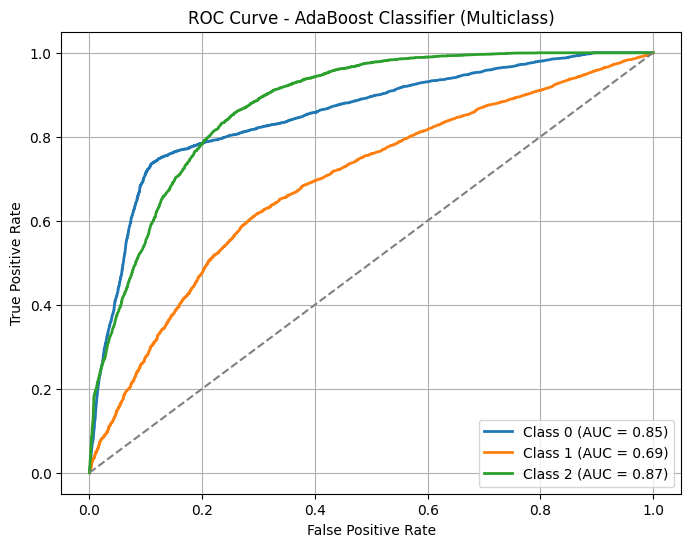

Macro-average AUC-ROC Score: 0.87


In [ ]:
# Binarize the target labels for multiclass classification
y_bin = label_binarize(y_over, classes=[0, 1, 2])  # Adjust based on your classes
n_classes = y_bin.shape[1]

# Get the predicted probabilities for each class
y_pred_prob = cross_val_predict(model, X_over, y_over, cv=kfold, method='predict_proba')

# Initialize the plot
plt.figure(figsize=(8, 6))

# Compute and plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost Classifier (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Compute the average AUC for all classes
macro_auc = auc(fpr, tpr)
print(f'Macro-average AUC-ROC Score: {macro_auc:.2f}')

**11.3. Voting Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# k-Fold Cross-Validation
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

# Create base models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()

# Create the ensemble model
estimators = [('logistic', model1), ('cart', model2), ('svm', model3)]
ensemble = VotingClassifier(estimators)

# Cross-validation results
results = model_selection.cross_val_score(ensemble, X_over, y_over, cv=kfold)
print("Voting Classifier Accuracy:", results.mean())

Voting Classifier Accuracy: 0.744925493452016


***11.3a.AUC-ROC Curve for Voting Classifier***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_predict, KFold # Import KFold directly
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

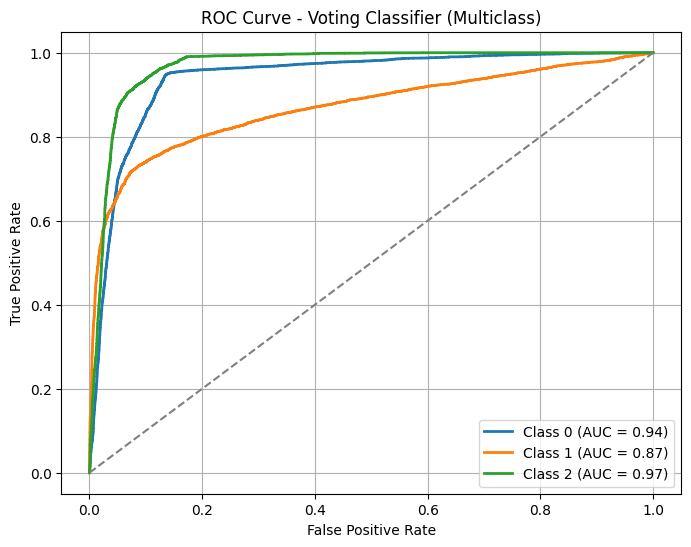

Macro-average AUC-ROC Score: 0.97


In [ ]:
# Initialize SVC with probability=True
model3 = SVC(probability=True)  # This enables predict_proba for SVC

# Create the ensemble model with soft voting
estimators = [('logistic', model1), ('cart', model2), ('svm', model3)]
ensemble = VotingClassifier(estimators, voting='soft')  # Use soft voting

# Binarize the target labels for multiclass classification
y_bin = label_binarize(y_over, classes=[0, 1, 2])  # Adjust based on your classes
n_classes = y_bin.shape[1]

# Get predicted probabilities for each classifier in the ensemble
y_pred_prob = cross_val_predict(ensemble, X_over, y_over, cv=kfold, method='predict_proba')

# Initialize the plot
plt.figure(figsize=(8, 6))

# Compute and plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Compute the average AUC for all classes
macro_auc = auc(fpr, tpr)
print(f'Macro-average AUC-ROC Score: {macro_auc:.2f}')

**11.4. Ensemble Method Comparison**

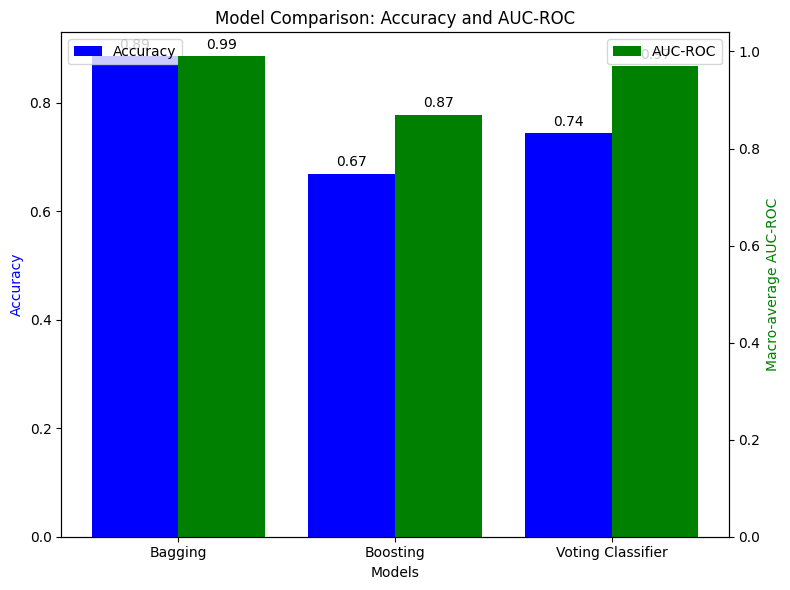

In [ ]:
# Data
models = ['Bagging', 'Boosting', 'Voting Classifier']
accuracy = [0.8855301622393961, 0.6693187490044071, 0.7443852666740682]
auc_roc = [0.99, 0.87, 0.97]

# Set up the positions of the bars
x = np.arange(len(models))

# Create a figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Accuracy on the left y-axis
bar_width = 0.4
rects1 = ax1.bar(x - bar_width / 2, accuracy, bar_width, label='Accuracy', color='b')

# Create a second y-axis for AUC-ROC scores
ax2 = ax1.twinx()
rects2 = ax2.bar(x + bar_width / 2, auc_roc, bar_width, label='AUC-ROC', color='g')

# Labels and title
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='b')
ax2.set_ylabel('Macro-average AUC-ROC', color='g')
ax1.set_title('Model Comparison: Accuracy and AUC-ROC')

# Set the x-ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the values on top of the bars
for rect in rects1:
    height = rect.get_height()
    ax1.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax2.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

This bar chart compares the performance of three classifiers—Bagging, Boosting, and Voting Classifier—based on two metrics: Accuracy and AUC-ROC. Bagging shows the highest accuracy (0.99), while Boosting achieves a lower accuracy (0.67). In terms of AUC-ROC, Bagging also outperforms the other models, followed by Boosting and Voting Classifier with AUC-ROC values of 0.87 and 0.74, respectively.